<a href="https://colab.research.google.com/github/Luke-687/Simulating-Chemotaxis--Q-learning-and-Heuristic-/blob/main/Chemotaxis_Hueristic_ErrorBars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General premise:
# Base around the idea of moving slowly in areas of highly concentrated positive chemicals, and quickly in areas without high concentrations of a given positive chemical
#Create a velocity function based around on pure calculation based on reward values, as well as some randomness to account for exploration
#Create a direction function, purely based around the premise of keep direction or change direction, change direction being completely random (direction defined by angle)
import math
import random
import matplotlib.pyplot as plt

def defineScene():
  x = []
  y = []
  color = []
  gradient = []
  reward = []
  #Consider 20x20 grid, source of chemical at (15,15) with a decrease in alpha by r^2
  for i in range (0,20):
    for j in range (0,20):
      x.append(j)
      y.append(i)
      #distance based calculations:
      distance = math.sqrt((i-9.5)**2+(j-9.5)**2)
      if(distance <= 5):
        color.append("green")
        if(not distance<=1):
          gradient.append(1/(distance**0.9))
          reward.append(10/(distance**1.5))
        else:
          gradient.append(1)
          reward.append(50)
      else:
        color.append("green")
        gradient.append(0)
        reward.append(-50)
  return x, y, color, gradient, reward
def calculate_velocity(posX, posY, rewards):
  posX = int(posX)
  posY = int(posY)
  currentReward = rewards[posX+posY*20]
  if(currentReward<0):
    velocity = 4
  else:
    velocity = 1.25/currentReward
  return velocity
def calculate_direction(pastR, currentR, currentDirection):
  if(pastR<=currentR):
    if(pastR == 0):
      return (currentDirection+ random.randint(-90,90))
    if(30/(currentR/pastR)>=90):
      return currentDirection + 90*(-1**random.randint(1,2))
    else:
      return currentDirection + 90/(currentR/pastR)*(-1**random.randint(1,2))
  else:
    return (currentDirection+ random.randint(90,270))

def simulate (alpha, gamma):
  #Define the initial parameters
  velocity = 7.5
  direction = random.randint(10,80)
  currentX = 0
  currentY= 0
  stepsToBeMade = 25
  xG, yG, colorG, gradient, reward = defineScene()

  #Track x,y pos
  x=[]
  y=[]

  pastReward = 0
  for i in range(0, stepsToBeMade):
    #Enter and calculate reward of values which are about to be moved on from
    currentX = max(0, min(currentX, 19))
    currentY = max(0, min(currentY, 19))
    x.append(currentX)
    y.append(currentY)

    #Find new position, and new current reward
    changeX = velocity * math.cos(direction*math.pi/180)
    changeY = velocity * math.sin(direction*math.pi/180)
    currentX = x[-1] + changeX
    currentY = y[-1] + changeY
    currentX = max(0, min(currentX, 19))
    currentY = max(0, min(currentY, 19))
    currentReward = pastReward + alpha*(reward[int(currentX+currentY*20)]+gamma*(reward[int(currentX+currentY*20)]-pastReward))

    #Redifine velocity and direction for next steps
    velocity = calculate_velocity(int(currentX), int(currentY), reward)
    direction = calculate_direction(pastReward, currentReward, direction)
    pastReward = currentReward
  return x,y

In [ ]:
alpha = 0.99
gamma = 0.99

25
25


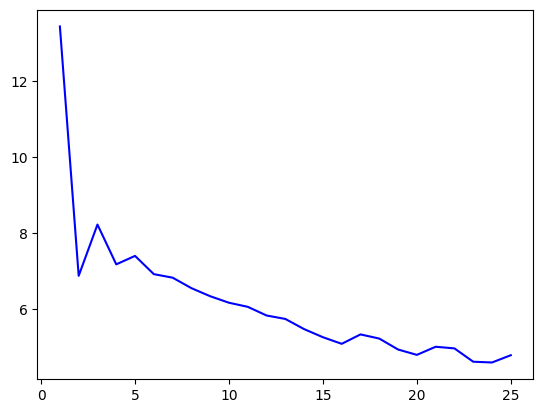

In [ ]:
#Simulate the model and graoh out average distance form center over 1000 runs from steps 0 to 25
step = []
dist = []
distance = 0
for i in range(1,26):
  step.append(i)
  dist.append(0)

for iteration in range (1000):
  resultX, resultY = simulate(alpha,gamma)
  for steps in range(0, len(resultX)):
    distance = math.sqrt((resultX[steps]-9.5)**2+(resultY[steps]-9.5)**2)
    dist[steps] += distance/1000

print(len(step))
print(len(dist))
plt.plot(step, dist, color = 'blue')

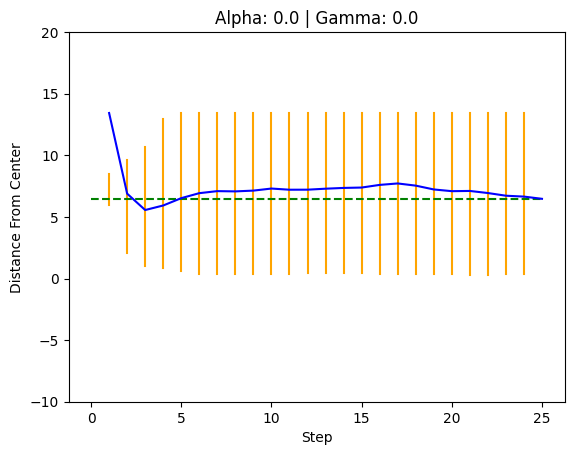

Final dist: 6.469348066588912




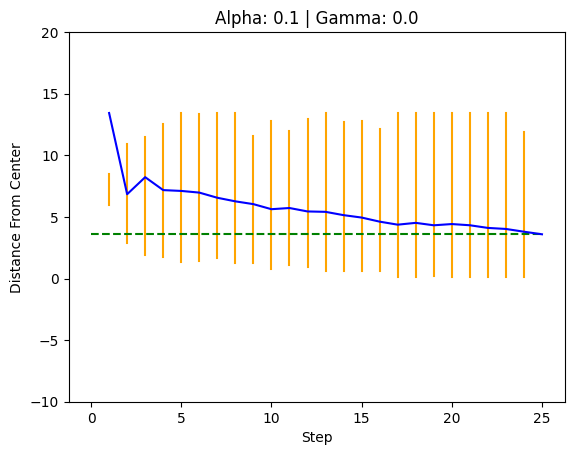

Final dist: 3.590849105881918




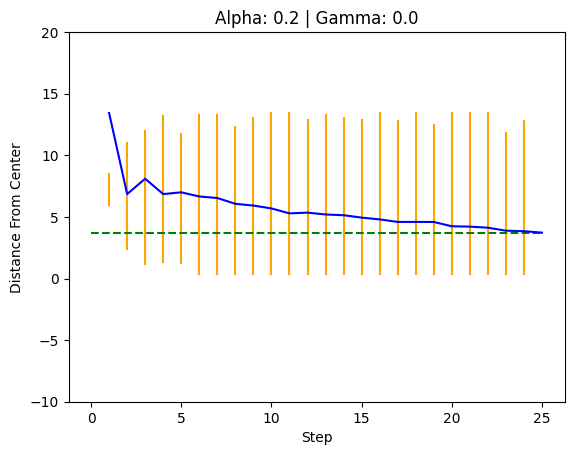

Final dist: 3.7233790338653696




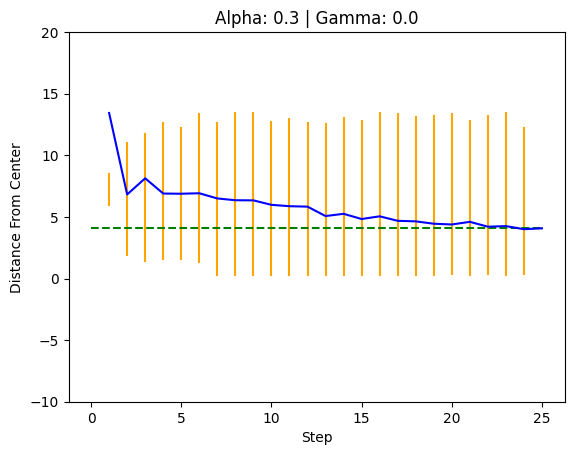

Final dist: 4.074293590811496




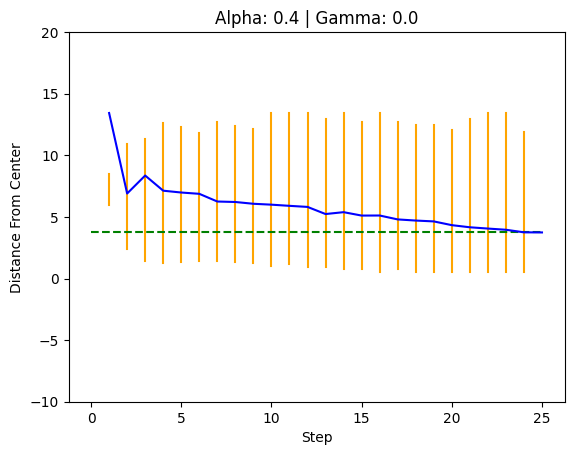

Final dist: 3.7400821859434505




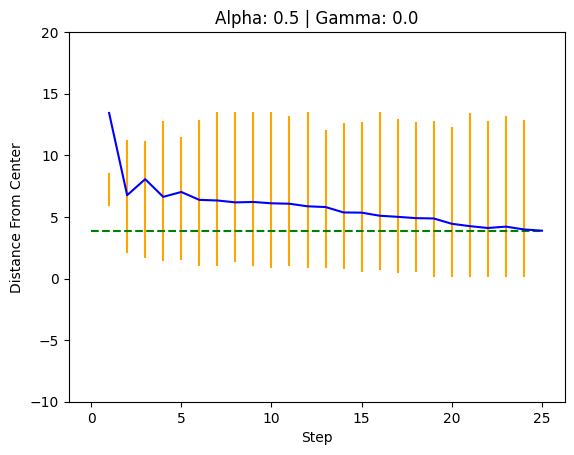

Final dist: 3.8817236463512046




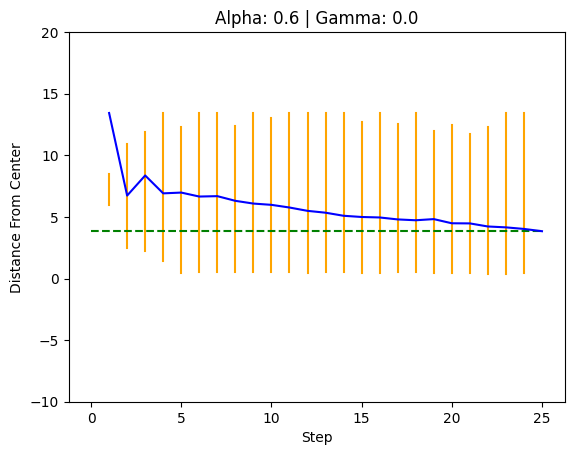

Final dist: 3.8405309717174316




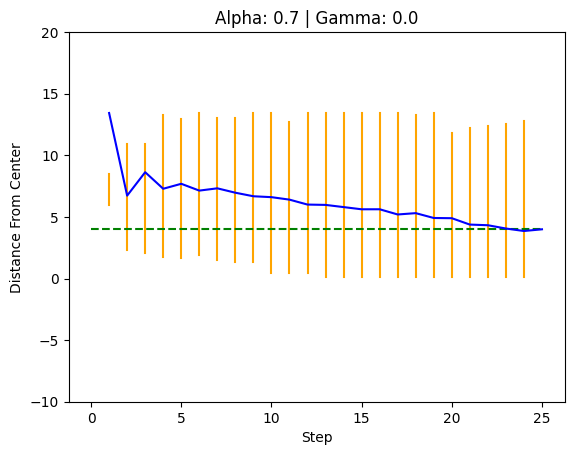

Final dist: 3.994948735852864




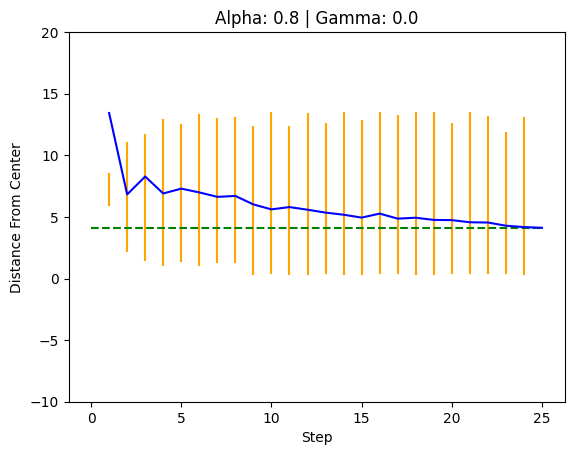

Final dist: 4.116949327397947




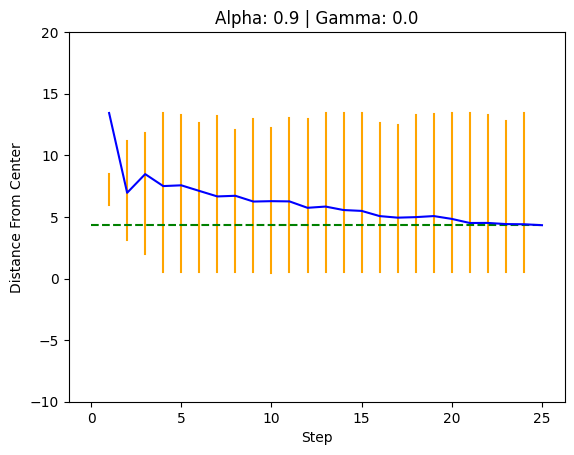

Final dist: 4.328511867423734




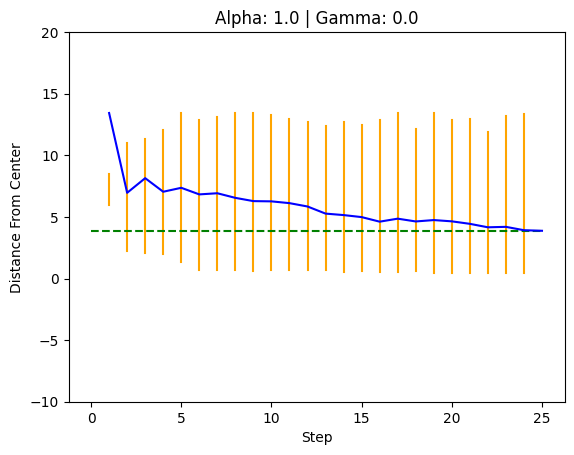

Final dist: 3.875395512541292




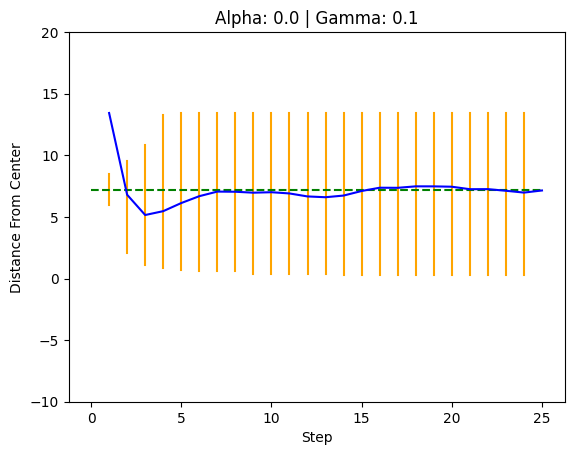

Final dist: 7.1464600806894945




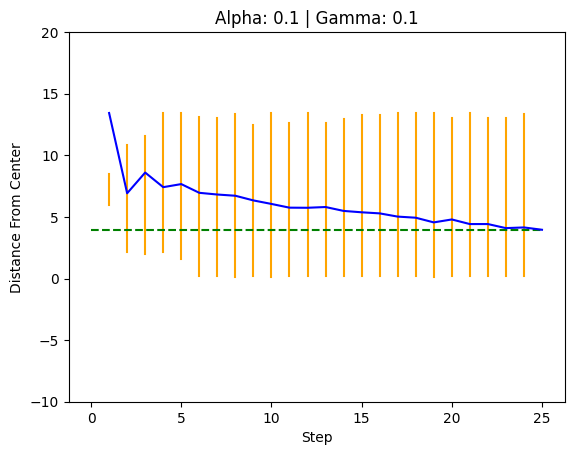

Final dist: 3.9578926292027483




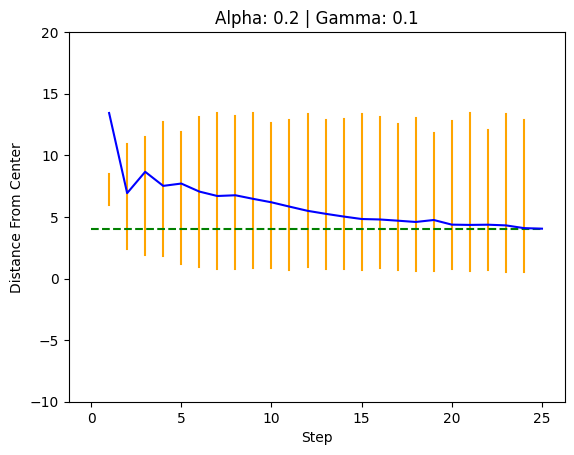

Final dist: 4.04654203728116




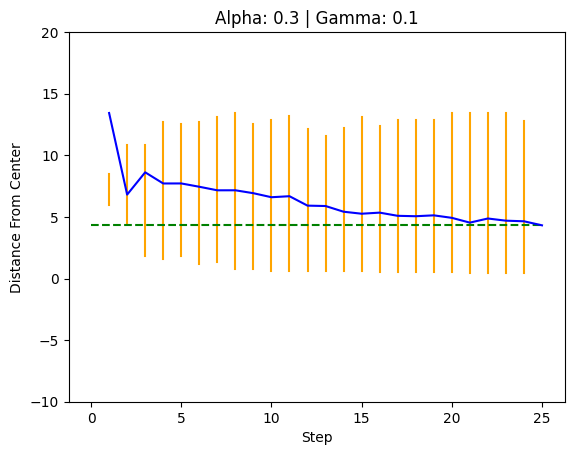

Final dist: 4.317977419904226




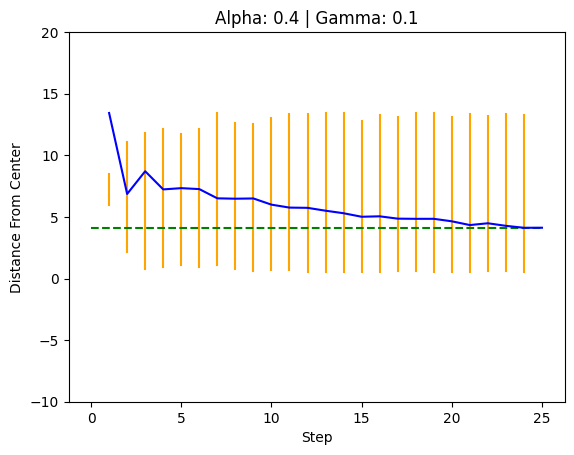

Final dist: 4.122262262112192




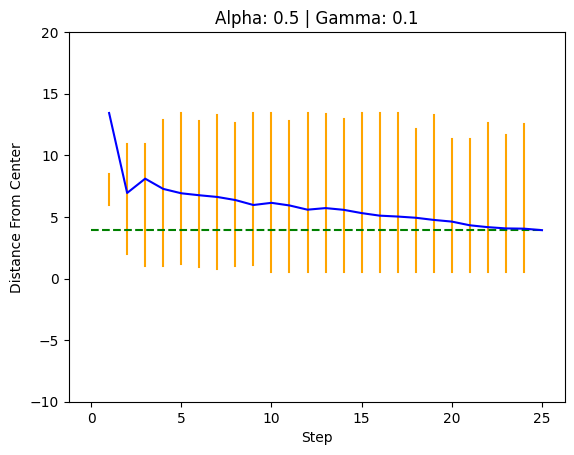

Final dist: 3.9253496964848096




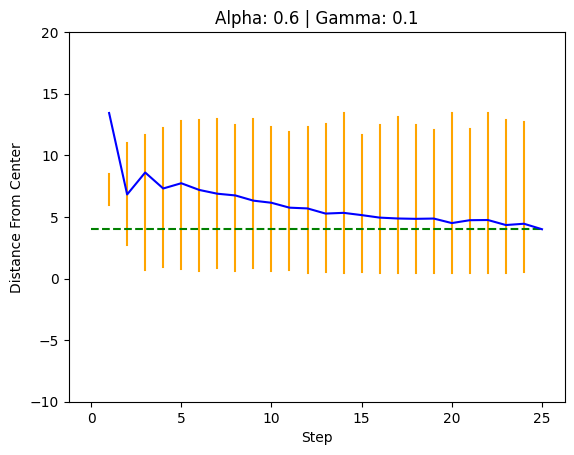

Final dist: 4.0001524175616865




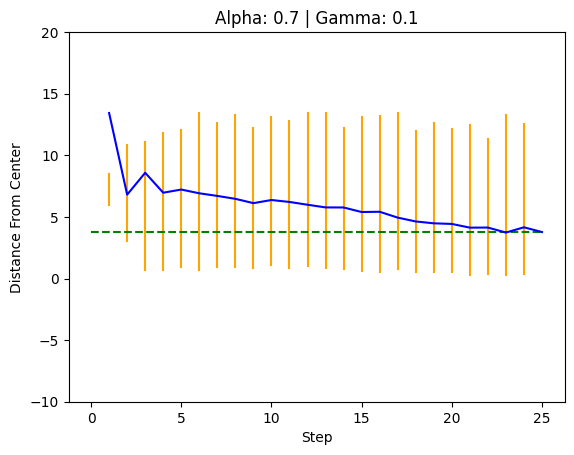

Final dist: 3.7714680210148237




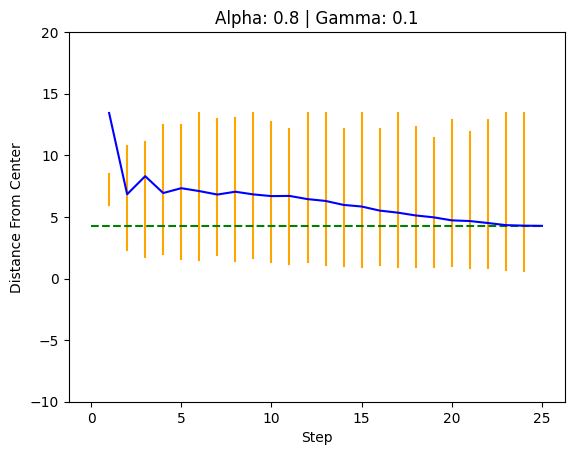

Final dist: 4.275553102072297




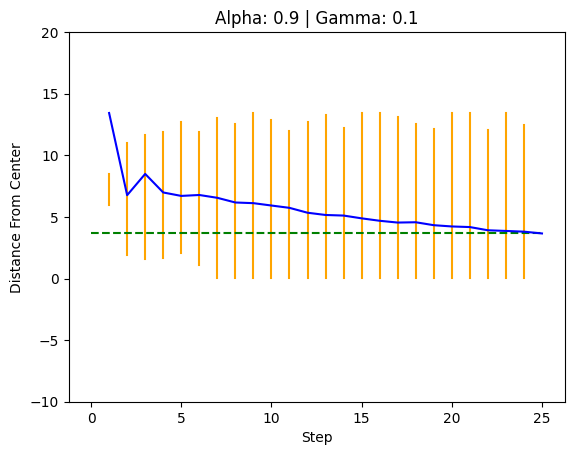

Final dist: 3.6578336994831044




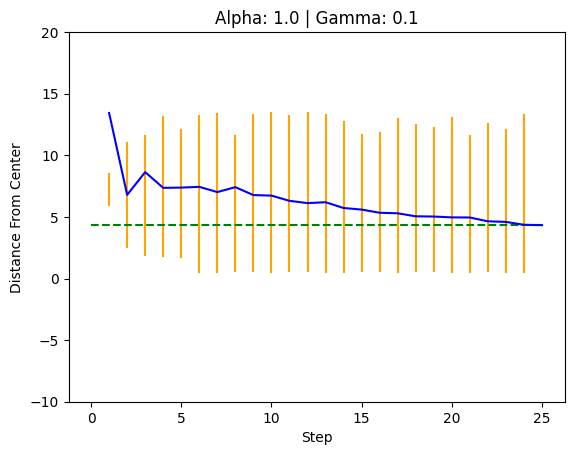

Final dist: 4.332268932694694




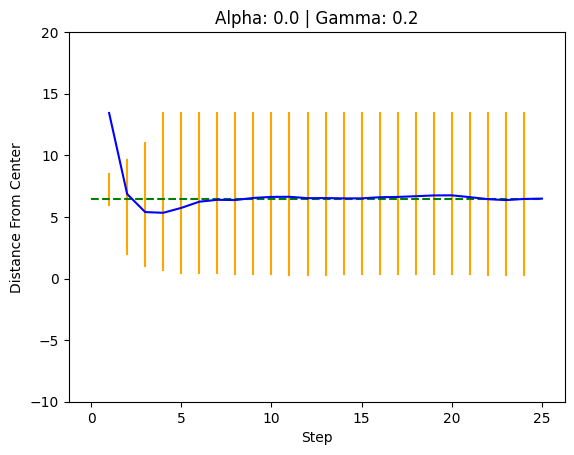

Final dist: 6.4843832486072275




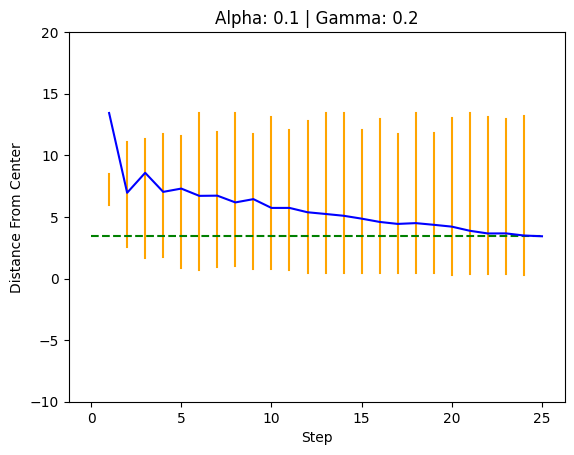

Final dist: 3.4302480336776116




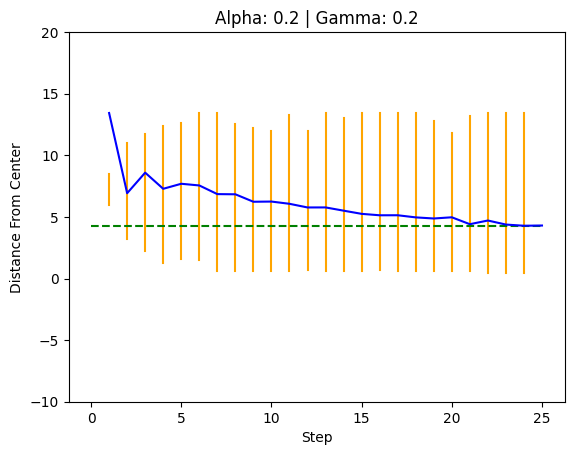

Final dist: 4.3021474149958285




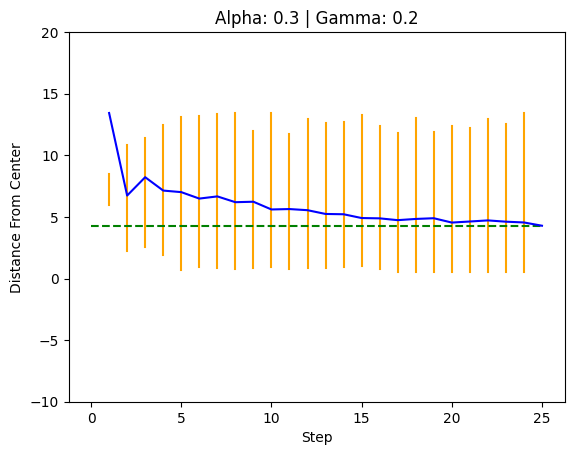

Final dist: 4.285743041152456




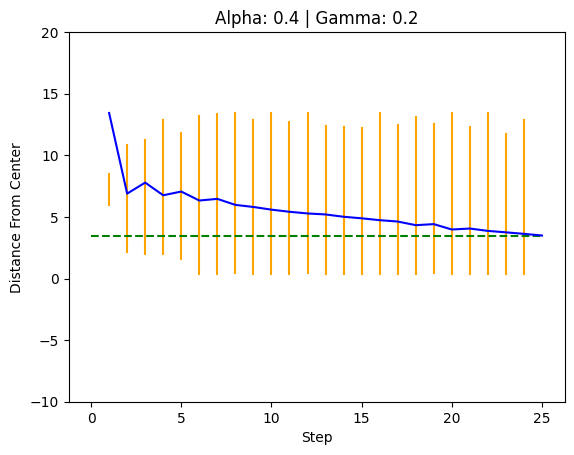

Final dist: 3.491950983165207




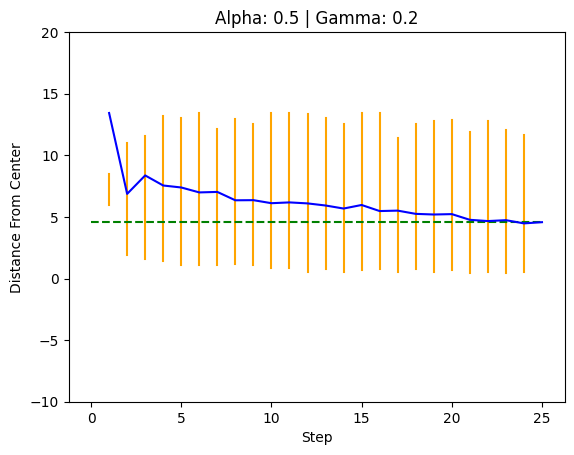

Final dist: 4.572705590191857




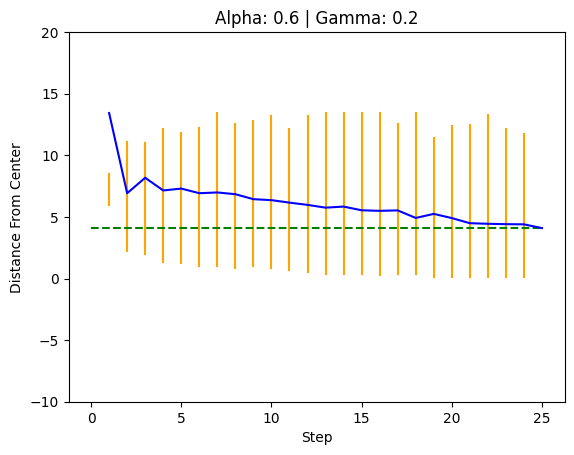

Final dist: 4.090674272561303




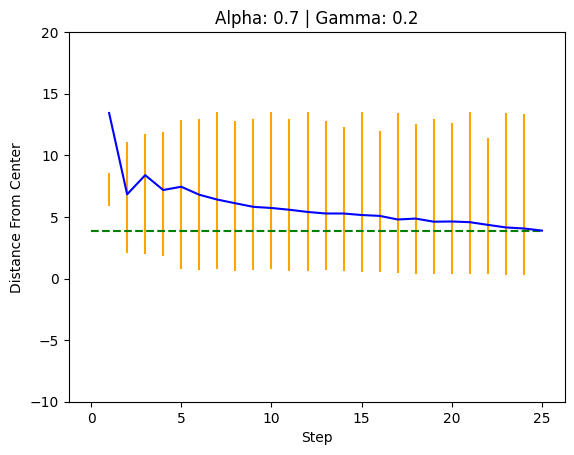

Final dist: 3.8894531515908026




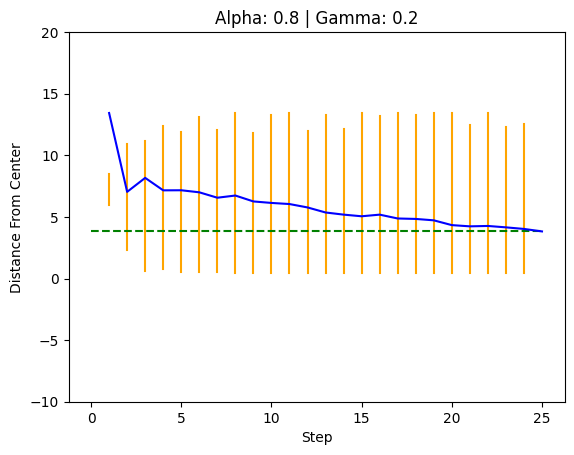

Final dist: 3.8233640717823745




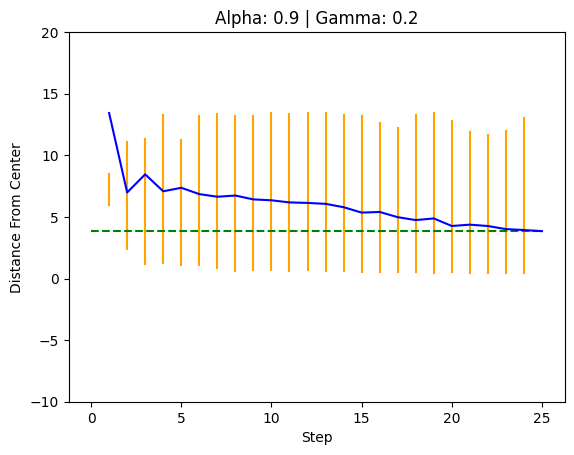

Final dist: 3.845675963326613




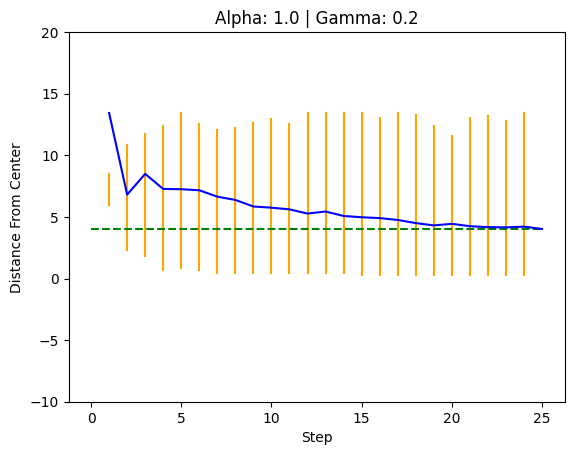

Final dist: 4.022149595636321




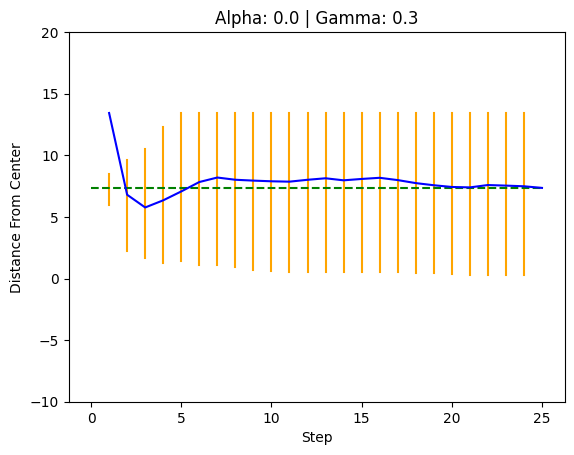

Final dist: 7.355150952644986




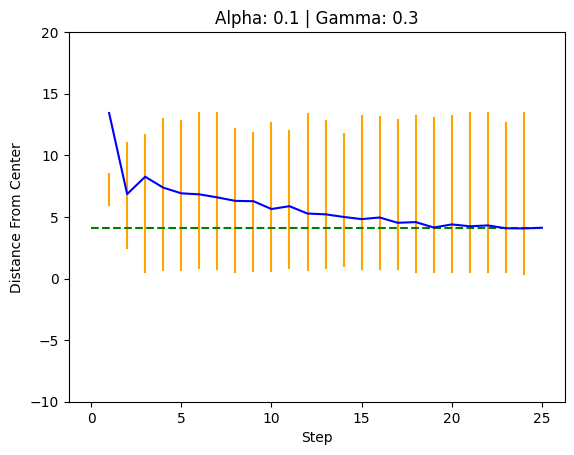

Final dist: 4.122062835586245




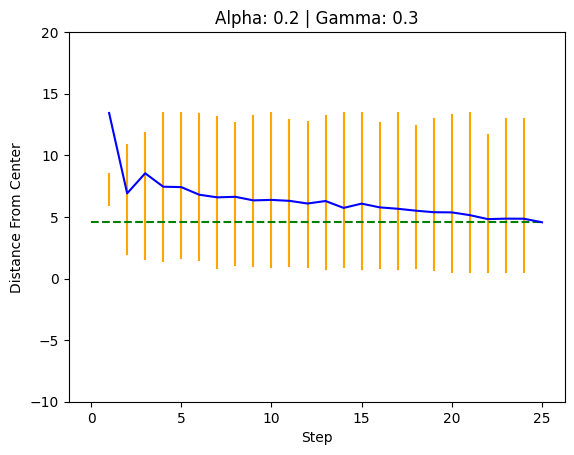

Final dist: 4.564963141623843




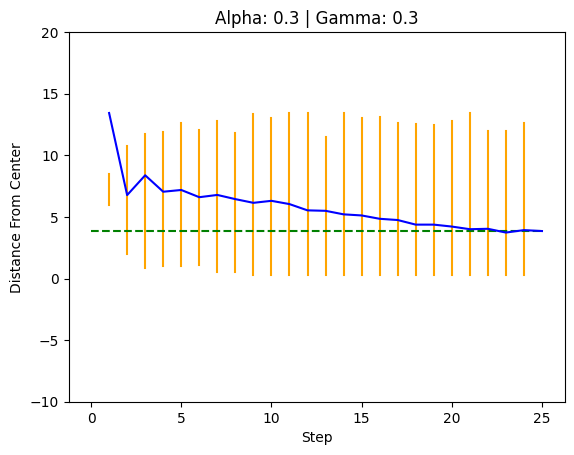

Final dist: 3.8536987814078345




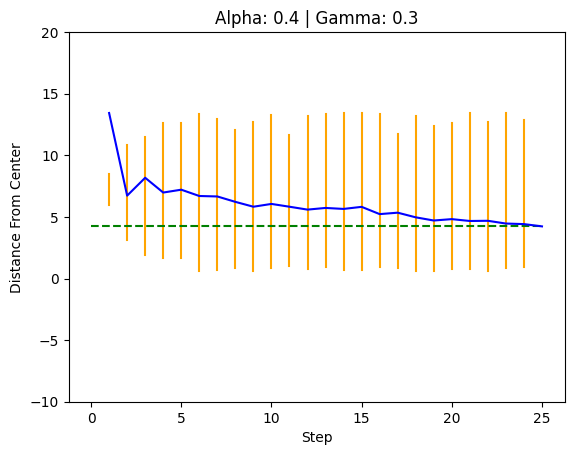

Final dist: 4.232370025933467




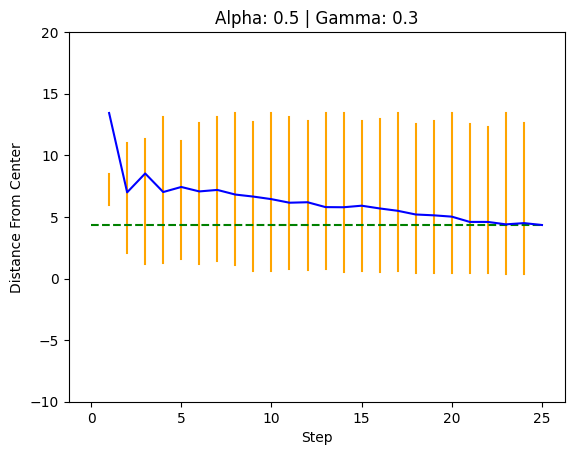

Final dist: 4.343015576567244




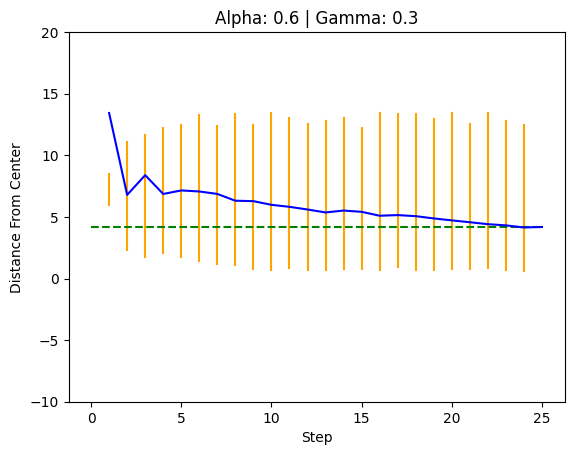

Final dist: 4.182337808405983




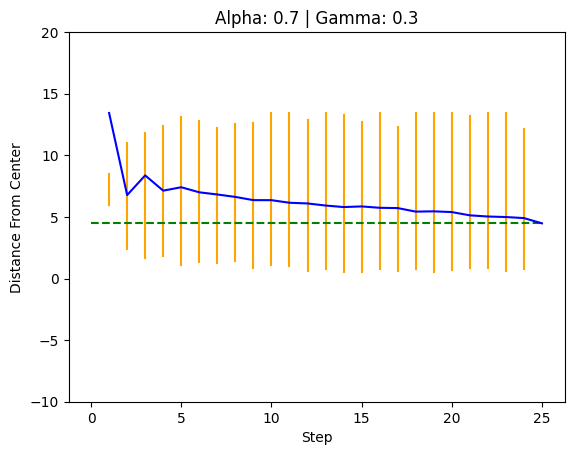

Final dist: 4.47854510925074




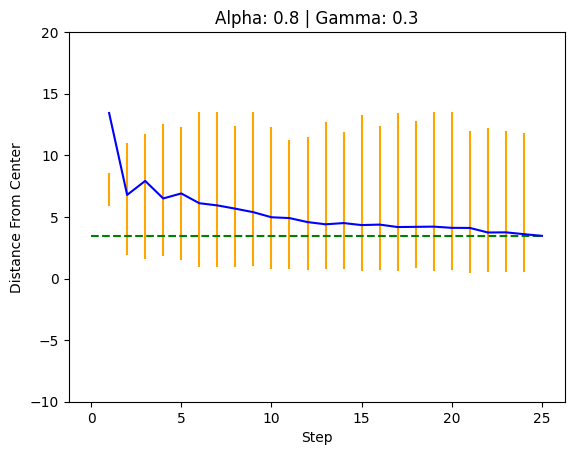

Final dist: 3.463382294159171




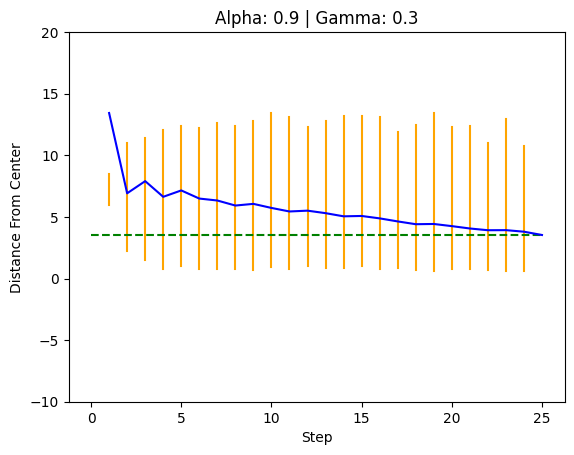

Final dist: 3.533169249512356




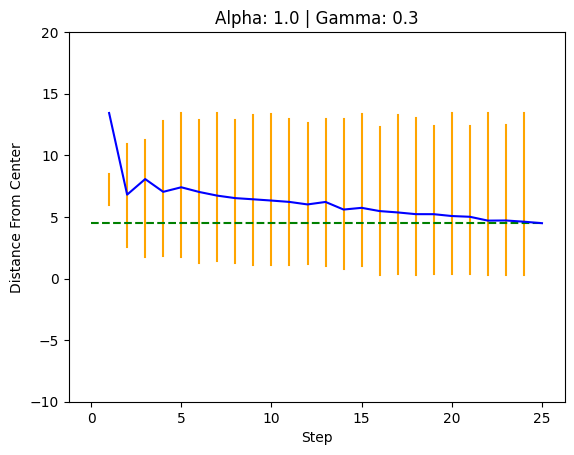

Final dist: 4.491243288075785




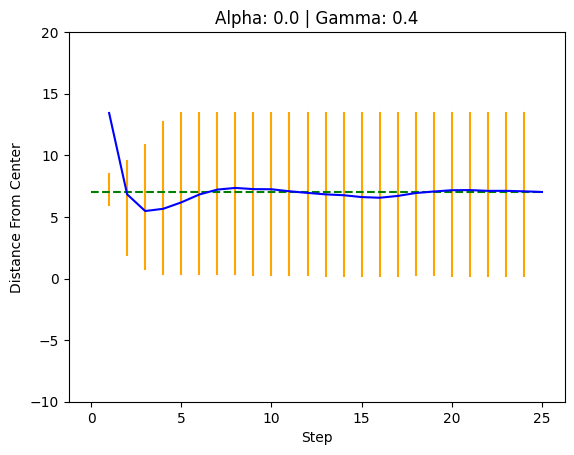

Final dist: 7.025544734214179




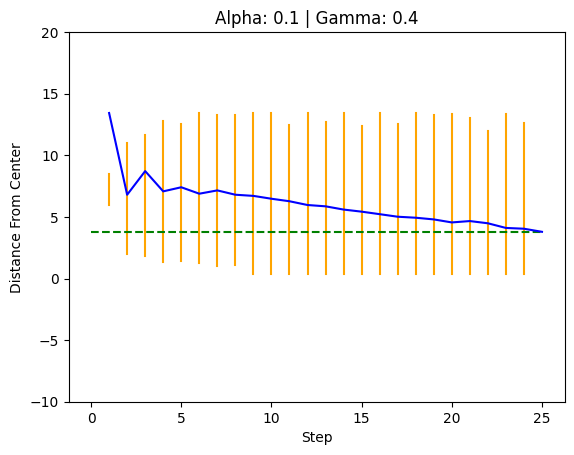

Final dist: 3.790950698276401




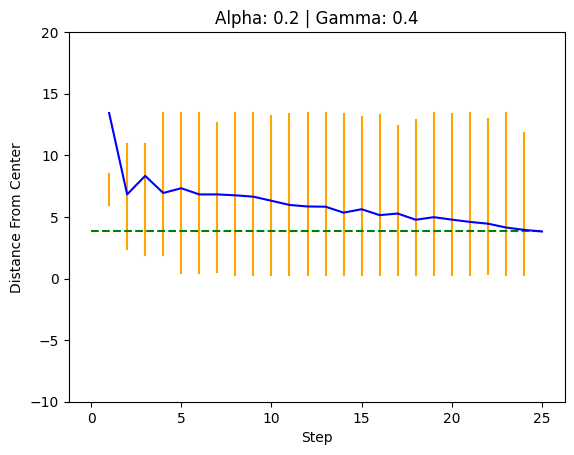

Final dist: 3.8176543129864244




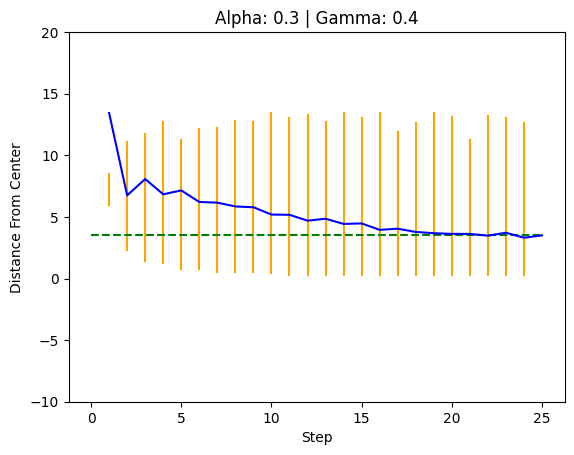

Final dist: 3.500605911060391




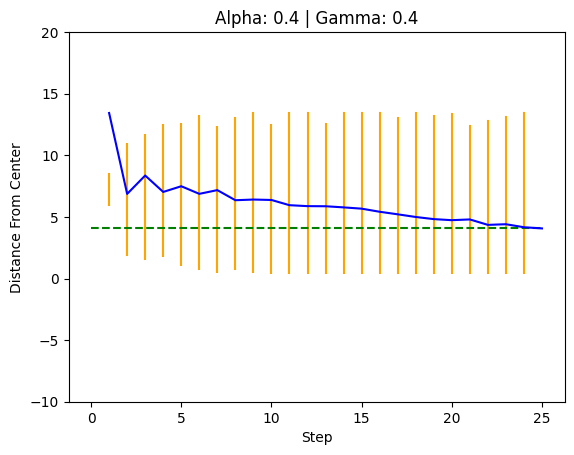

Final dist: 4.066859531832974




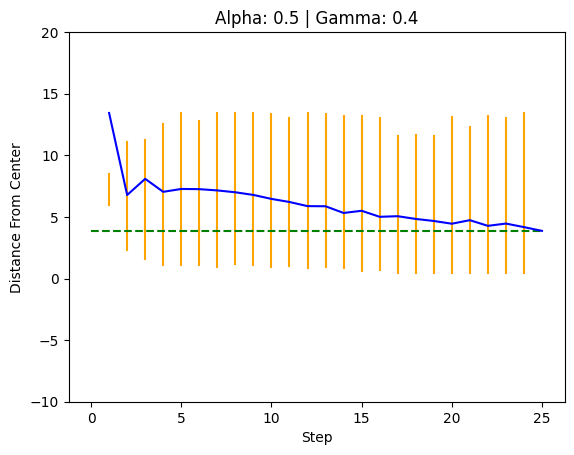

Final dist: 3.867654076154043




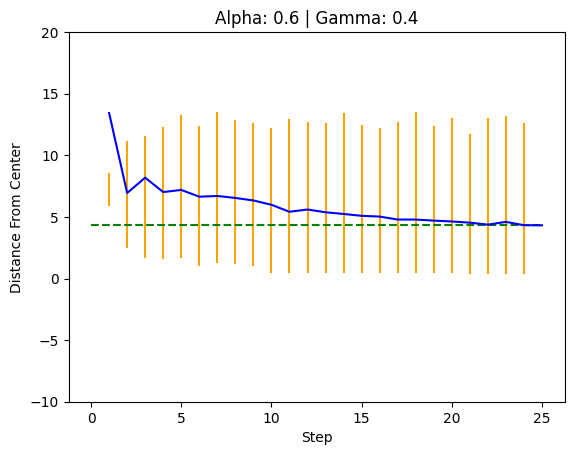

Final dist: 4.318615116113074




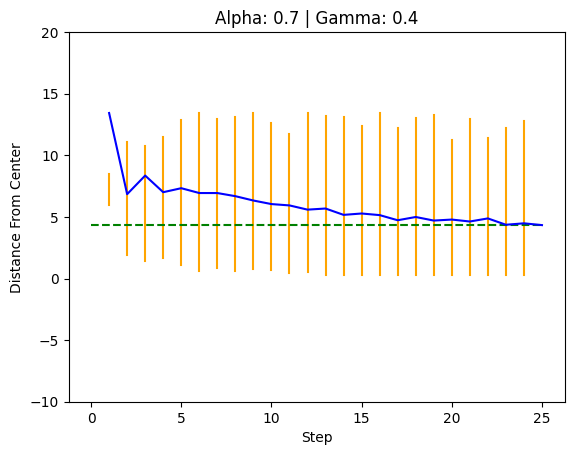

Final dist: 4.3349417800821275




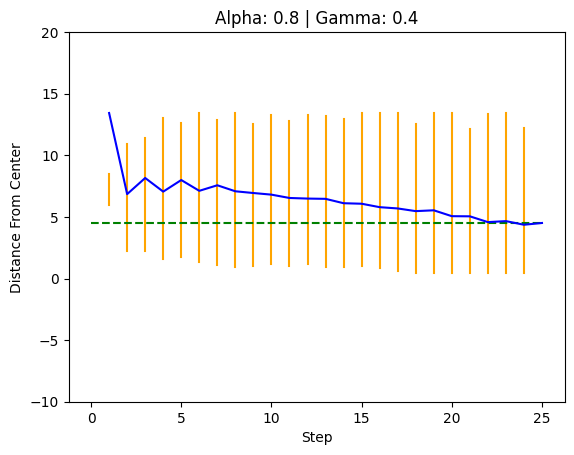

Final dist: 4.508223305886948




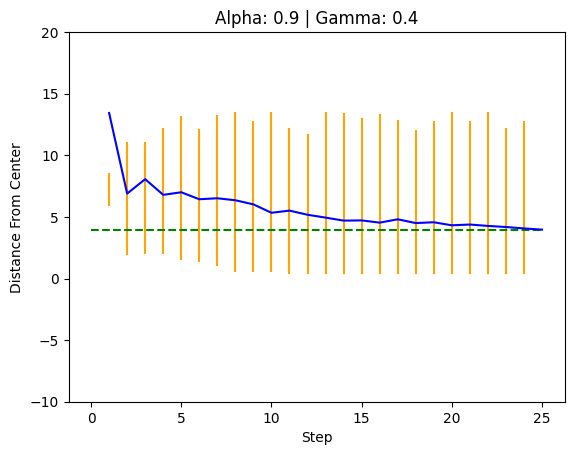

Final dist: 3.9674724939633585




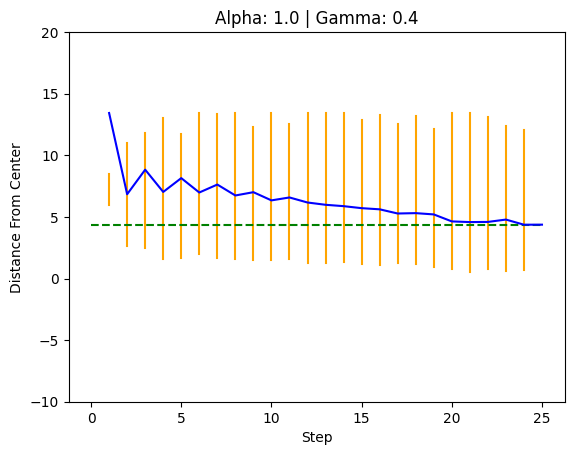

Final dist: 4.372212033640013




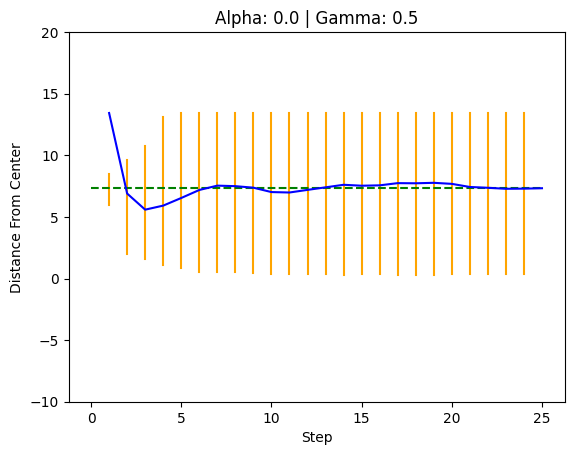

Final dist: 7.328371900438962




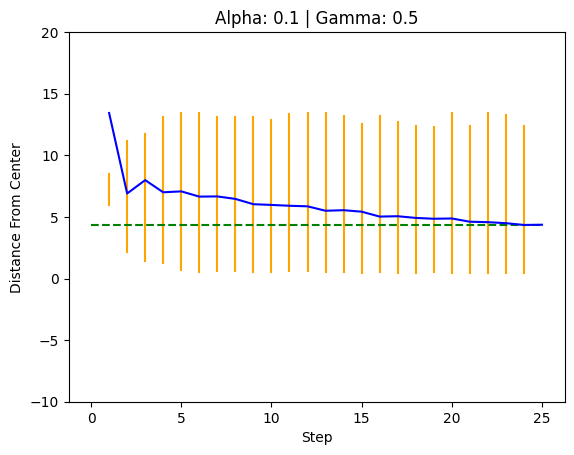

Final dist: 4.366134559090512




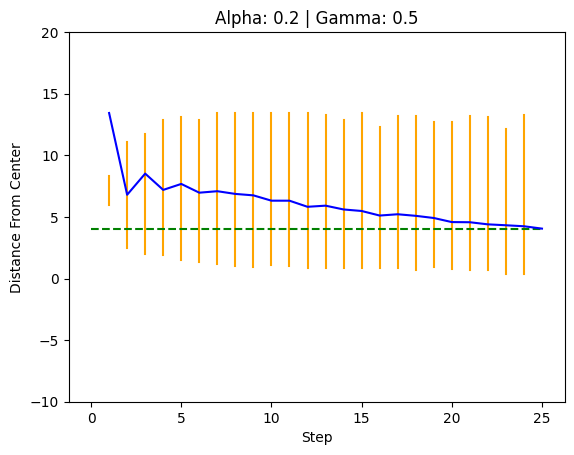

Final dist: 4.050899534536455




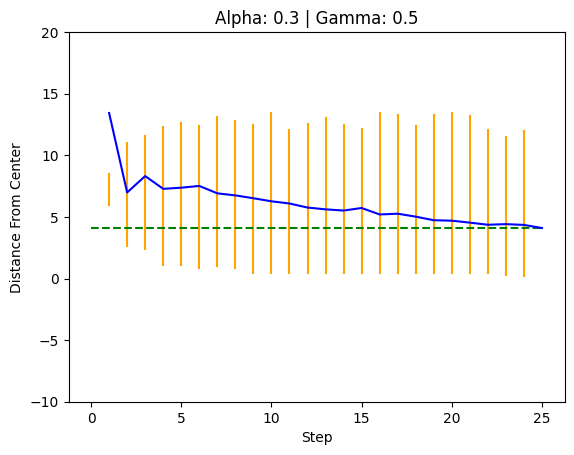

Final dist: 4.09721491626624




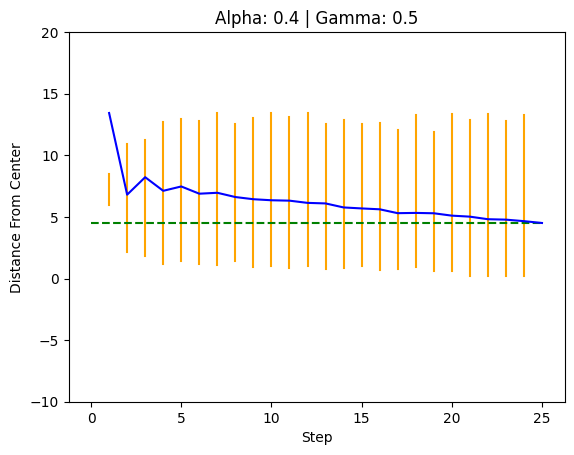

Final dist: 4.507578512262931




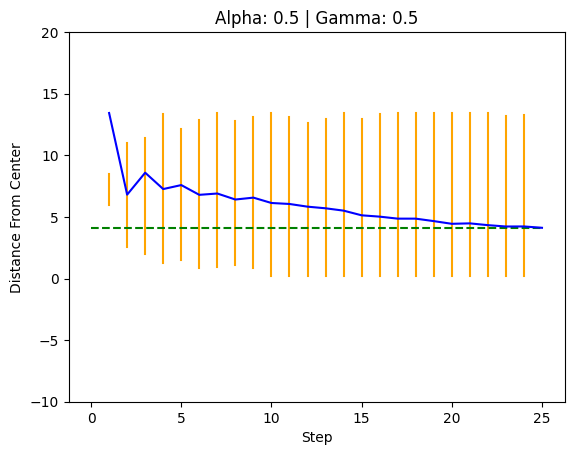

Final dist: 4.117590142201333




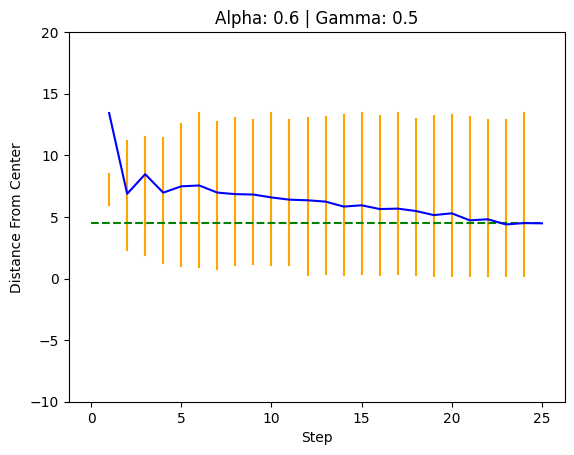

Final dist: 4.480772141335388




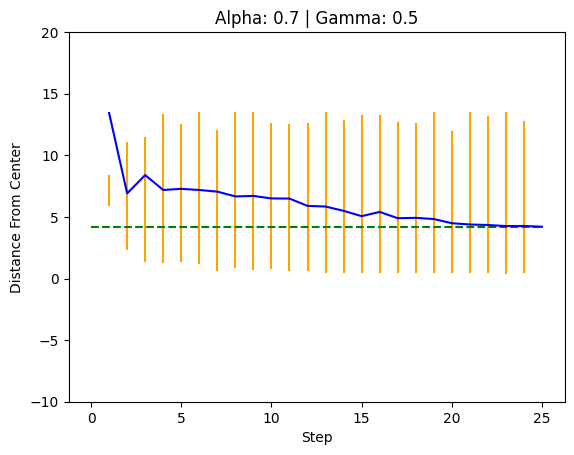

Final dist: 4.202948737935478




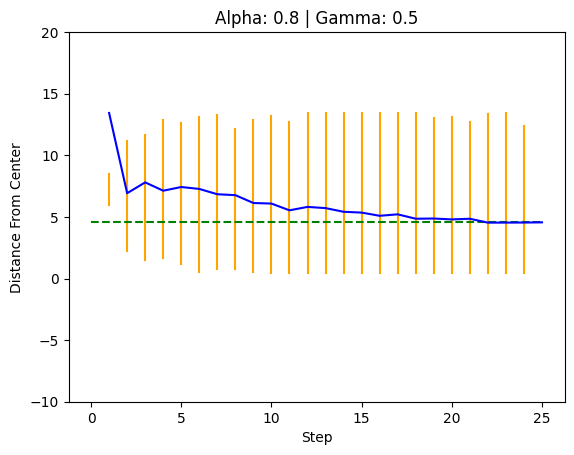

Final dist: 4.558361903411205




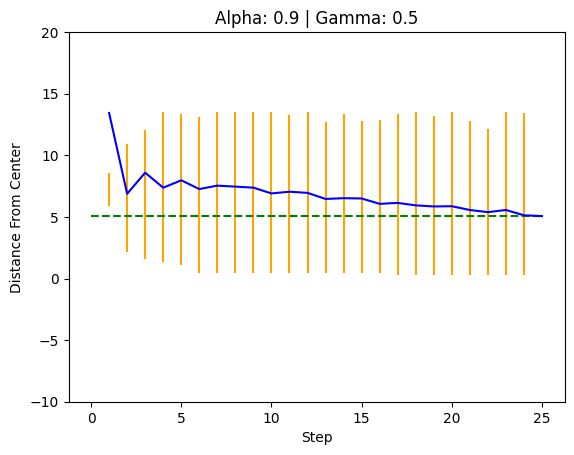

Final dist: 5.066429938749515




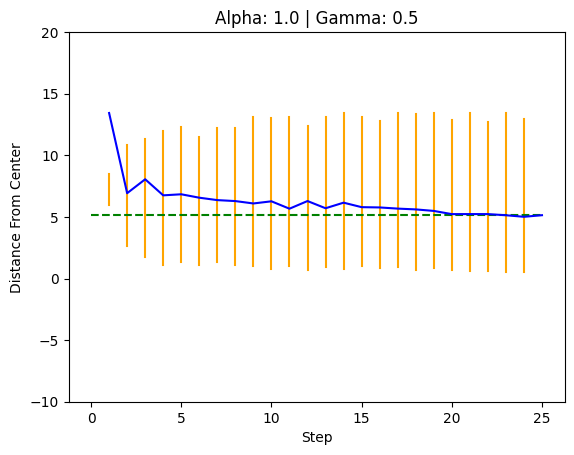

Final dist: 5.139469910740209




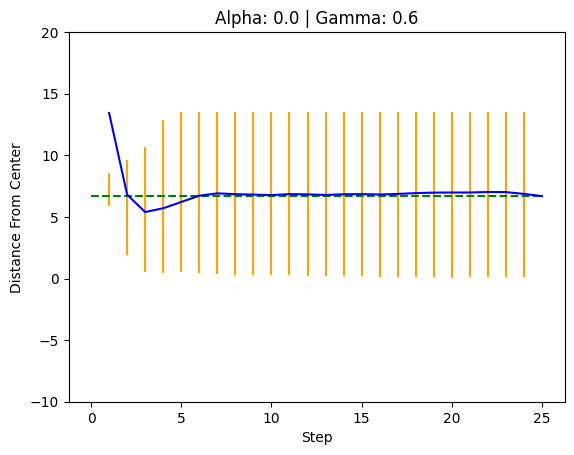

Final dist: 6.688040792330556




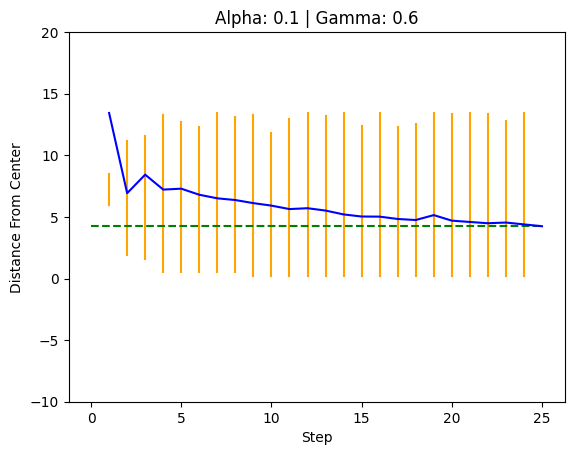

Final dist: 4.244982705699987




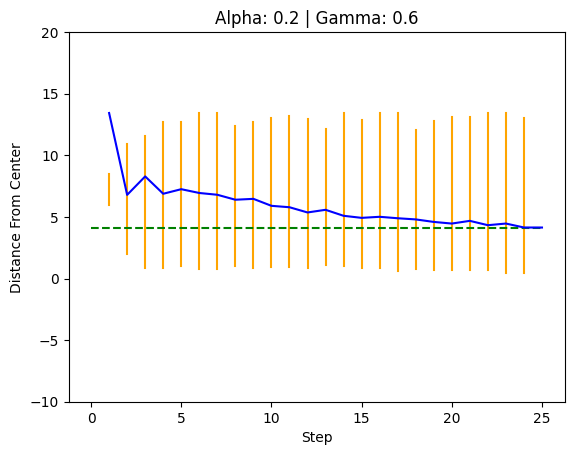

Final dist: 4.138599598073818




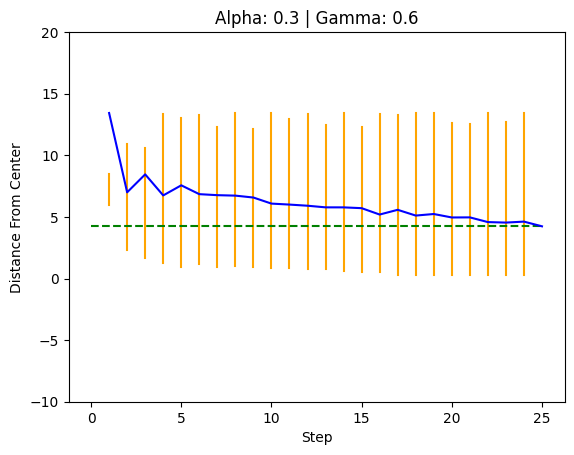

Final dist: 4.236948812757901




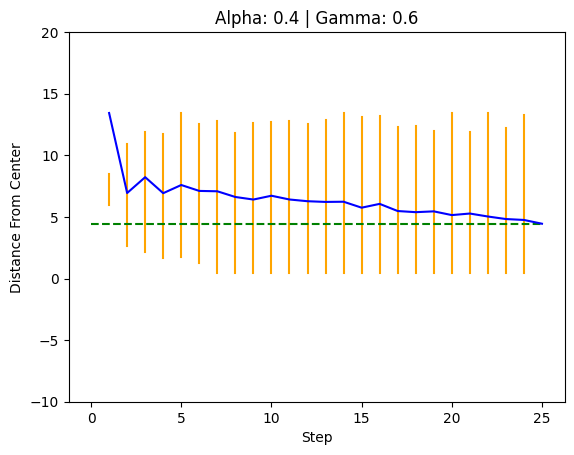

Final dist: 4.447550799012781




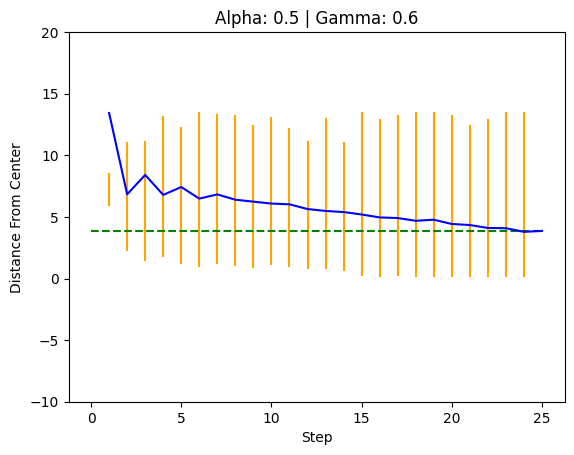

Final dist: 3.86375418764352




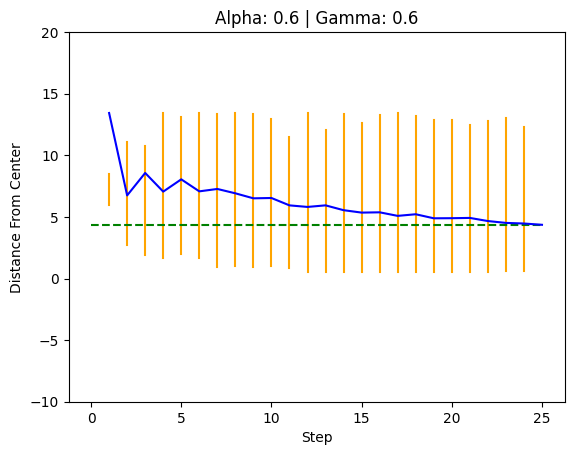

Final dist: 4.361200902099372




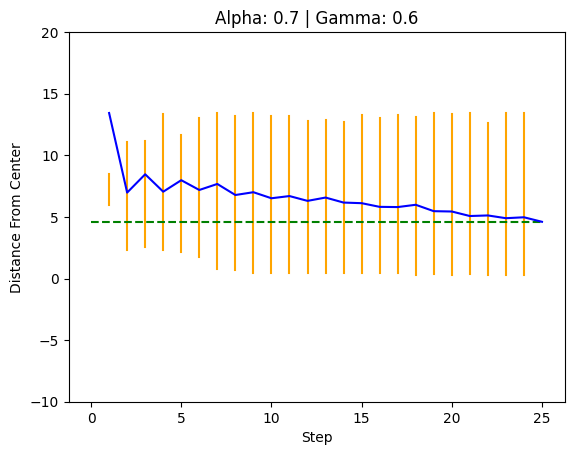

Final dist: 4.604213513661375




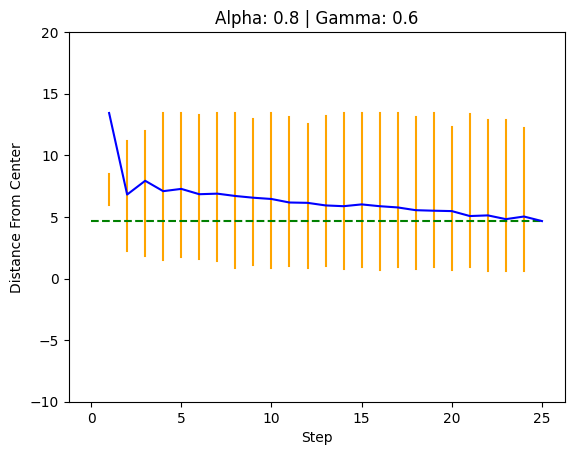

Final dist: 4.661954803012768




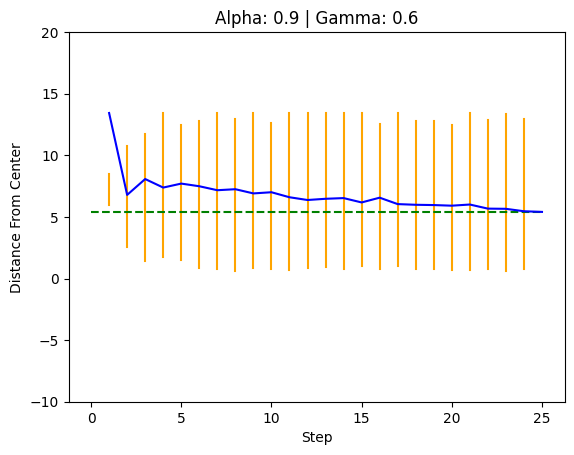

Final dist: 5.407352806539666




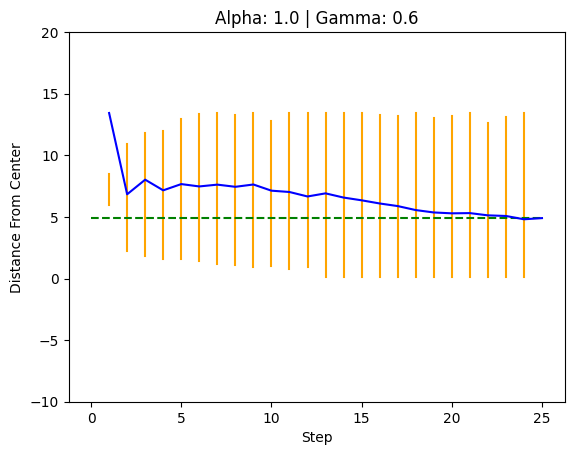

Final dist: 4.903874244697132




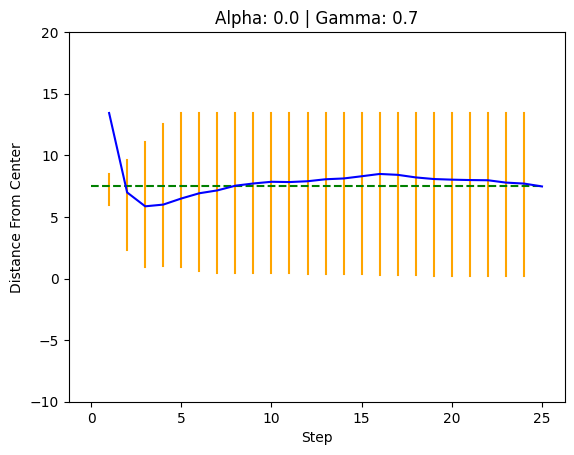

Final dist: 7.47427115505865




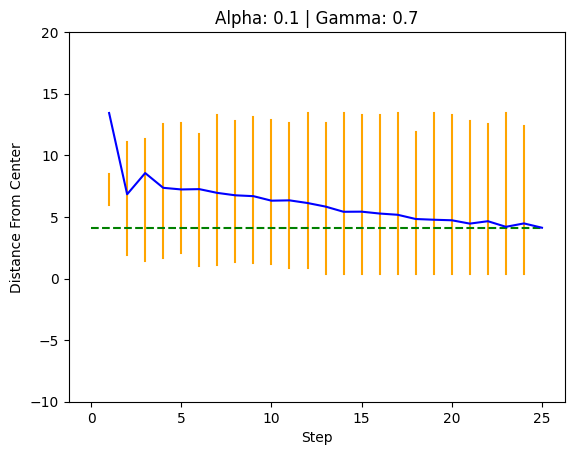

Final dist: 4.122878428602473




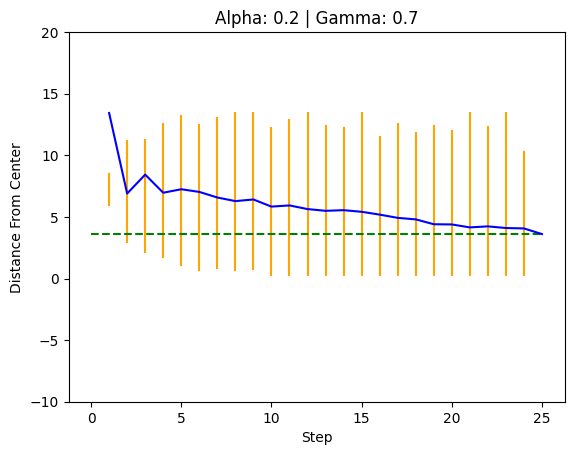

Final dist: 3.6077103430342774




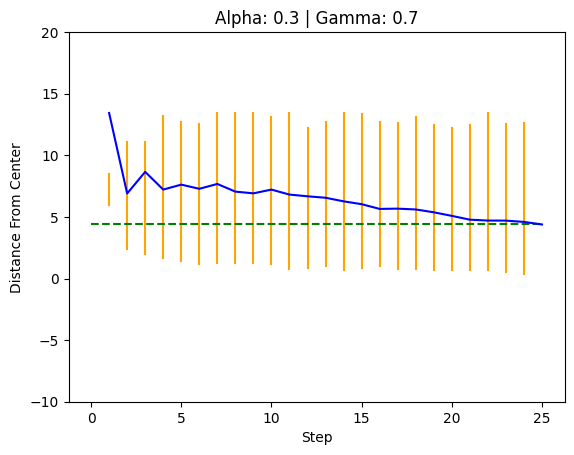

Final dist: 4.387107444149296




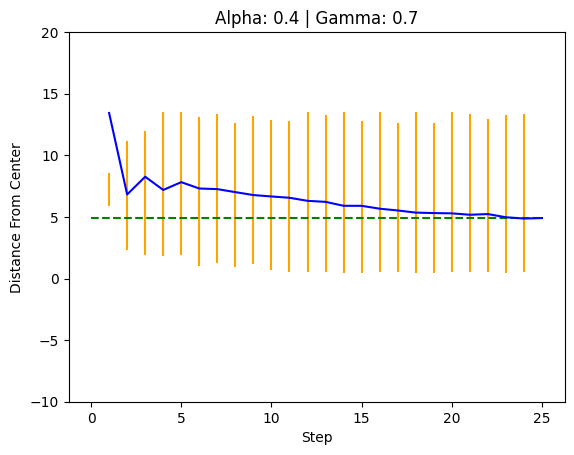

Final dist: 4.907888039085938




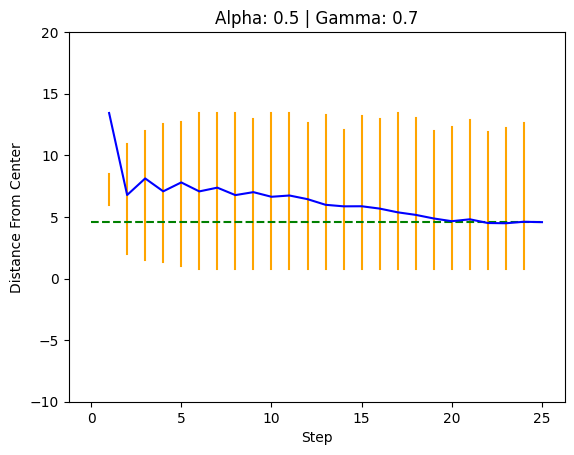

Final dist: 4.575264164094022




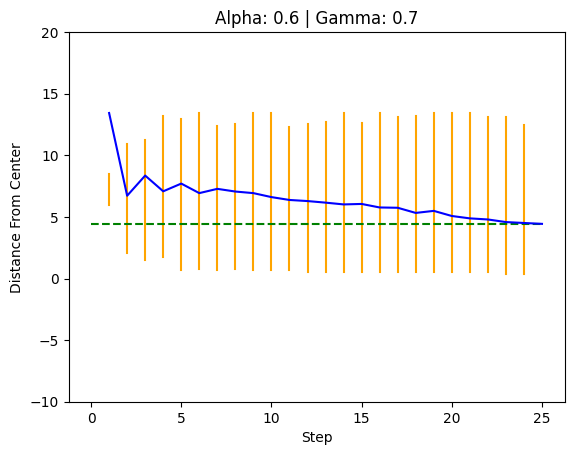

Final dist: 4.436908886212284




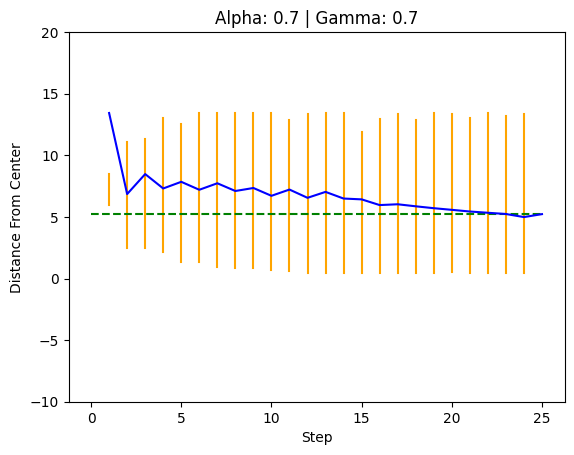

Final dist: 5.226842965203913




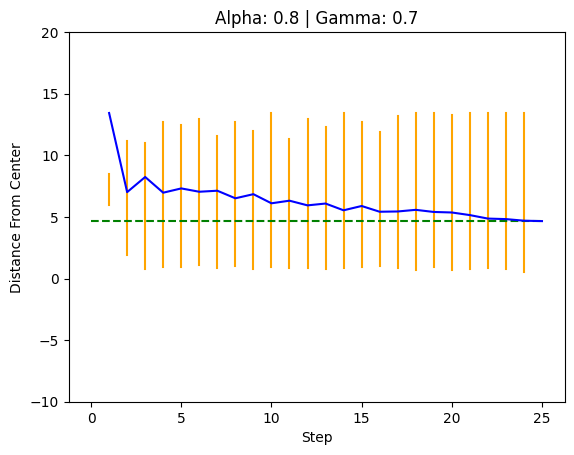

Final dist: 4.660252556198601




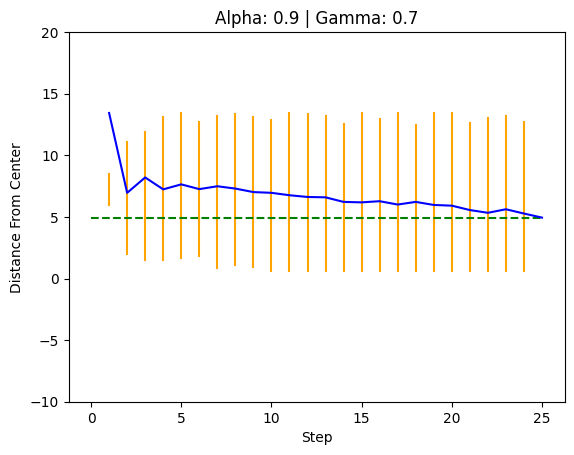

Final dist: 4.9449816893615575




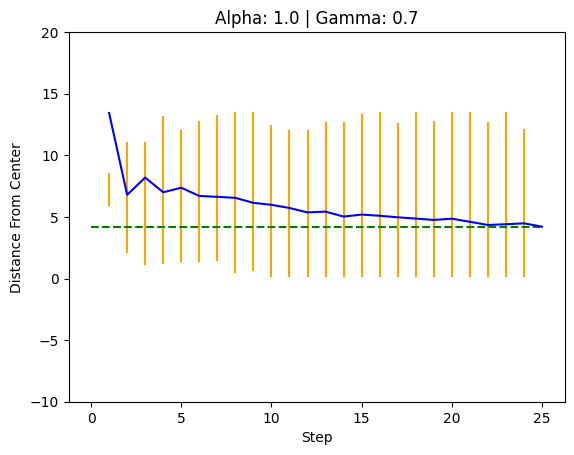

Final dist: 4.211711924425998




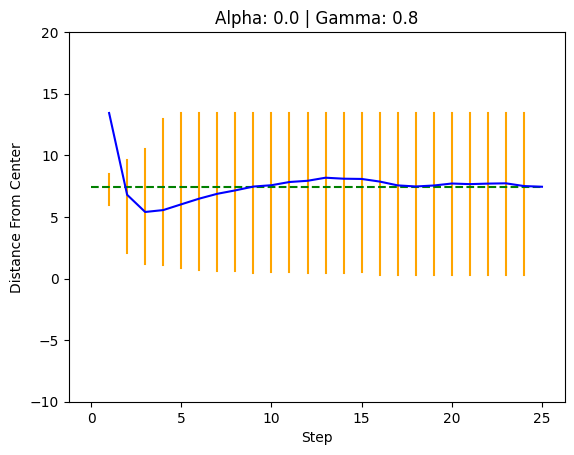

Final dist: 7.4495808001617




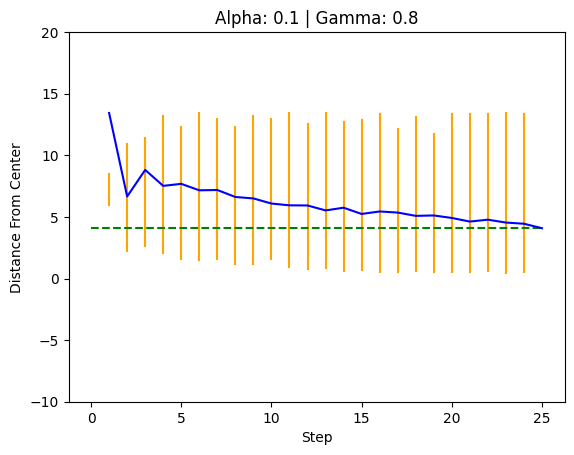

Final dist: 4.08279185267303




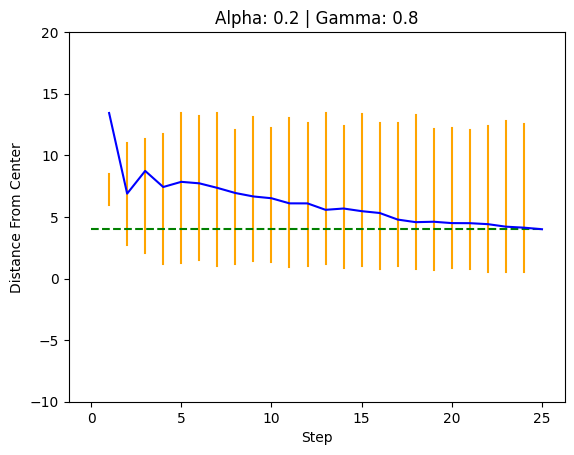

Final dist: 4.000468681653455




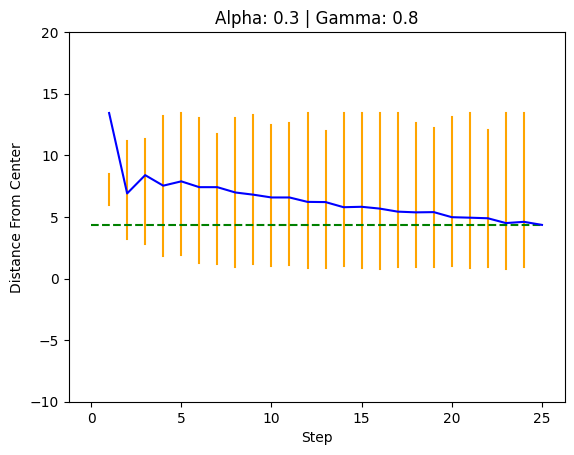

Final dist: 4.352637006243589




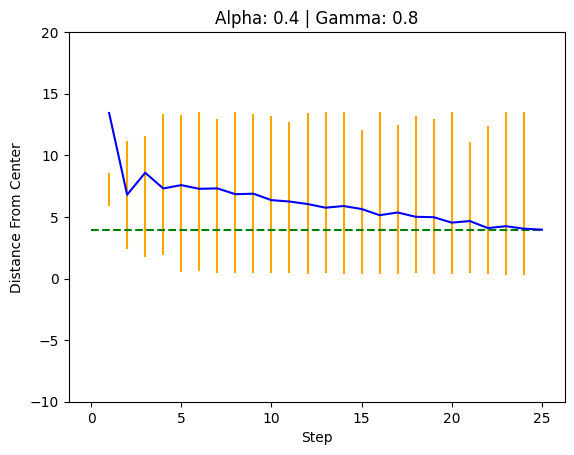

Final dist: 3.966670810040569




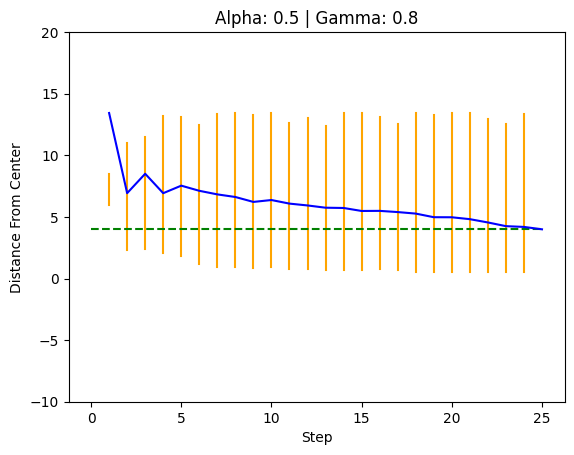

Final dist: 3.9947475516239654




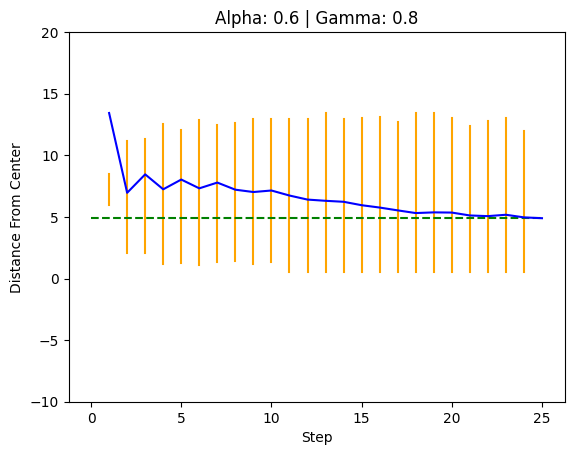

Final dist: 4.896105278059065




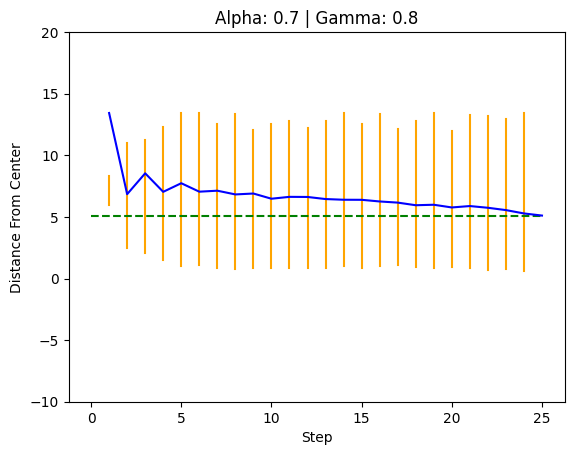

Final dist: 5.110343921776066




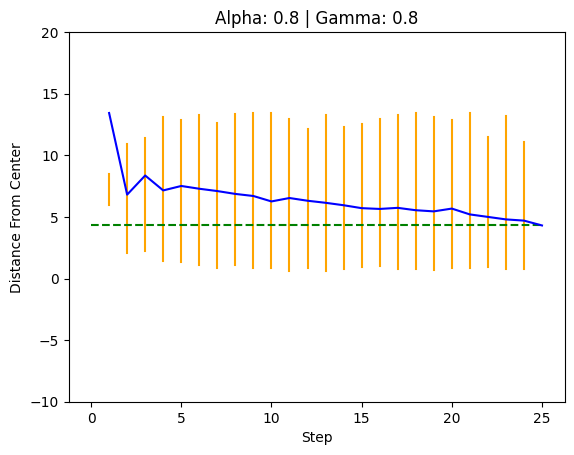

Final dist: 4.307539595435073




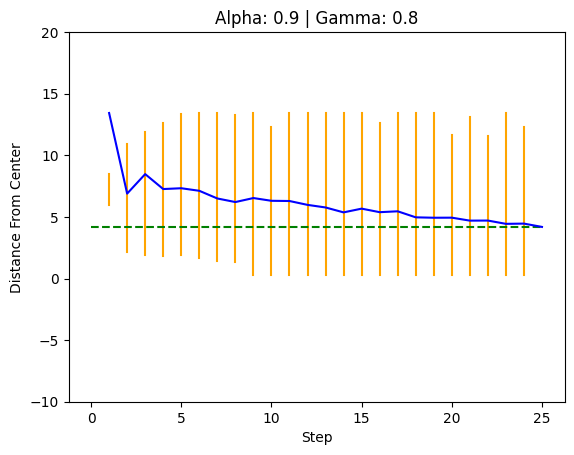

Final dist: 4.18795353132745




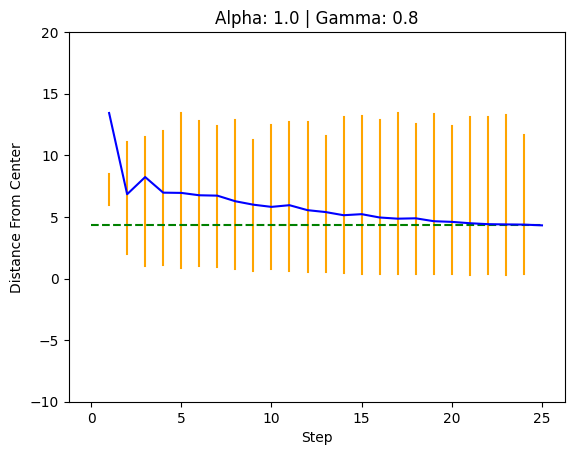

Final dist: 4.316154359353803




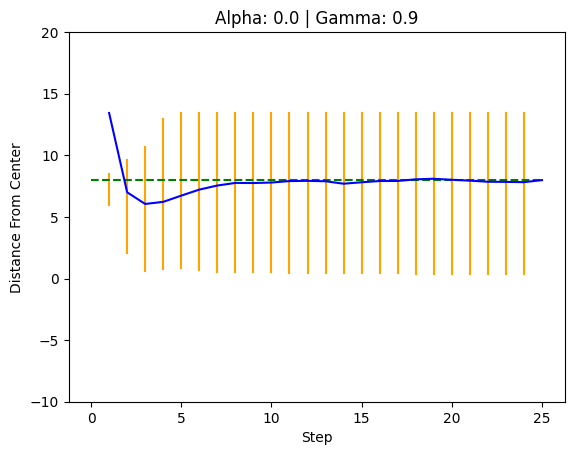

Final dist: 7.9883287560009855




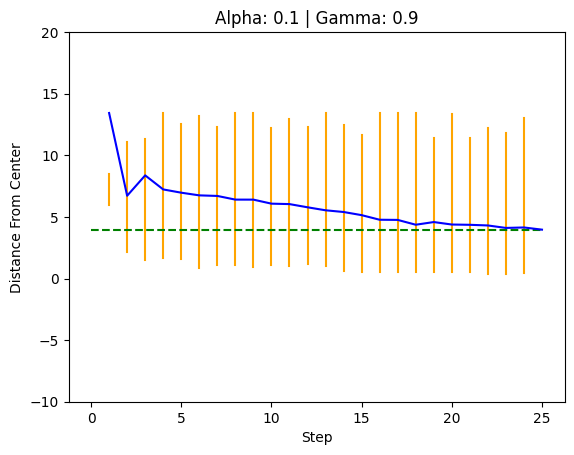

Final dist: 3.9669053605542937




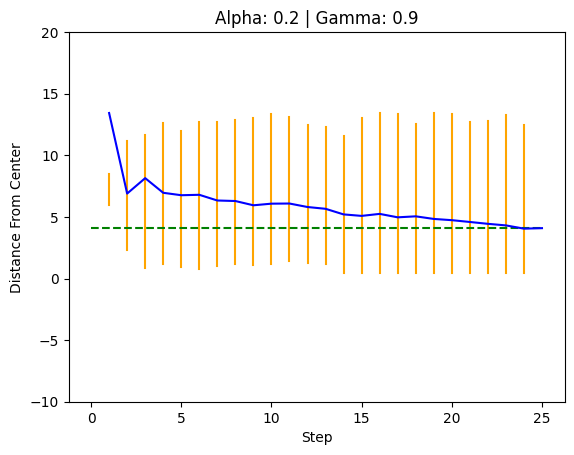

Final dist: 4.088403774497093




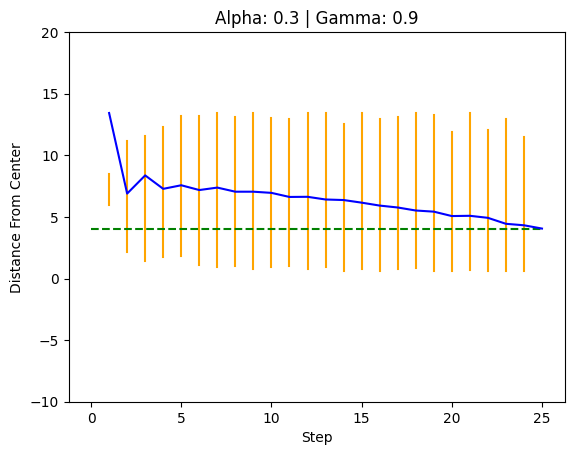

Final dist: 4.054814919057951




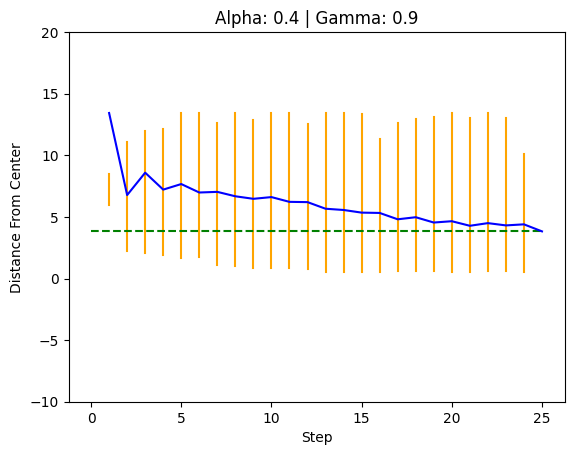

Final dist: 3.8268537280398256




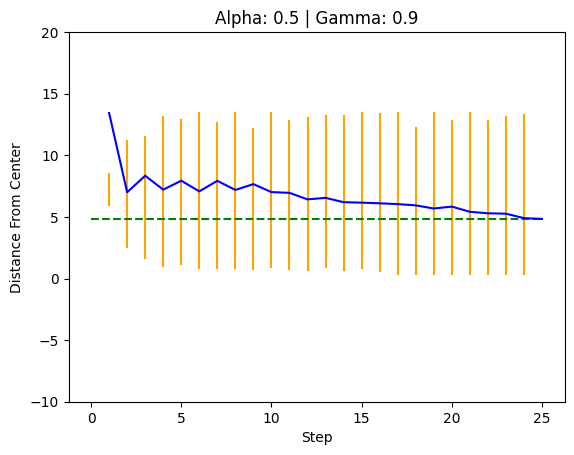

Final dist: 4.839149846726914




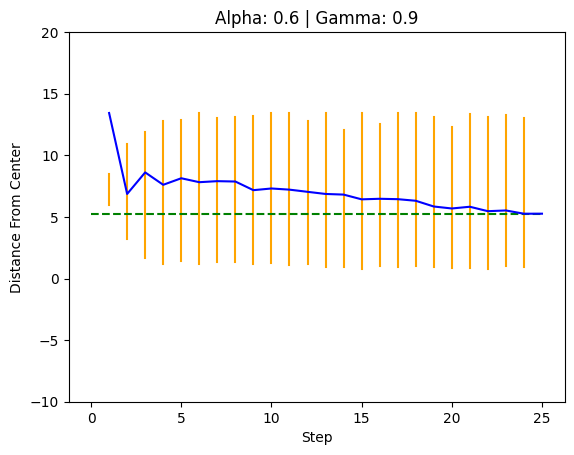

Final dist: 5.262366834602434




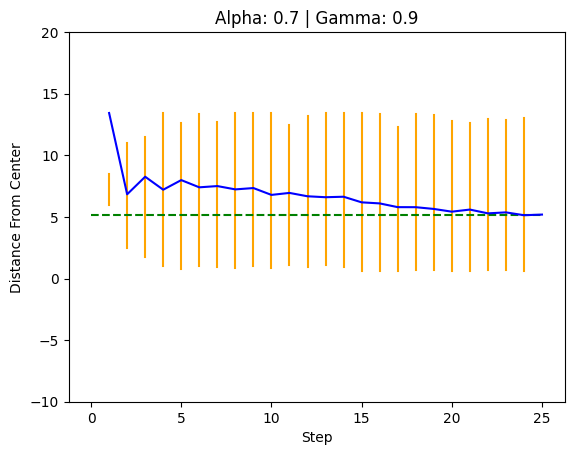

Final dist: 5.190673170967272




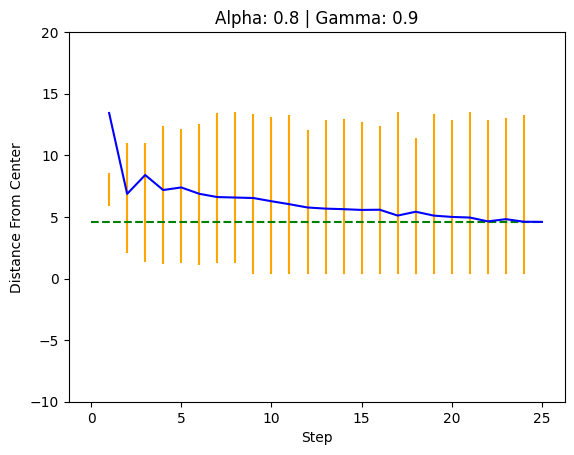

Final dist: 4.597624701318041




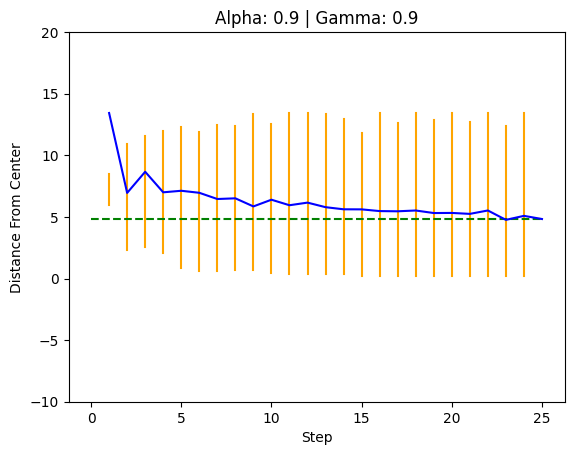

Final dist: 4.829189274872302




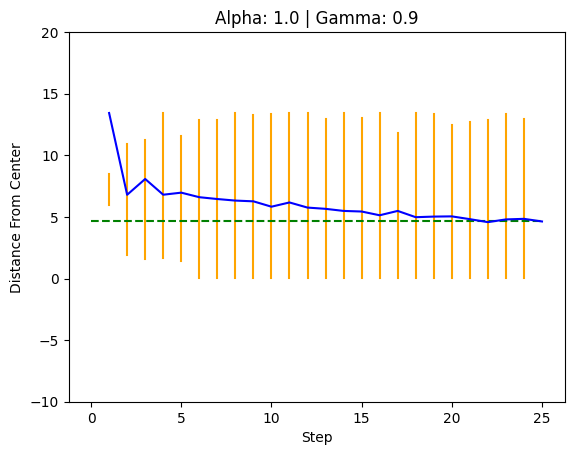

Final dist: 4.631002734327943




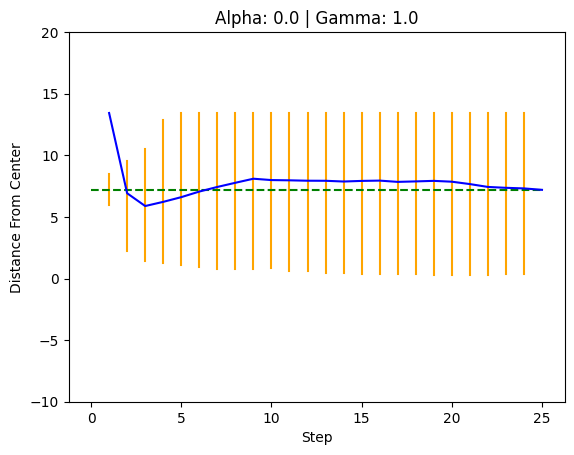

Final dist: 7.198787943026896




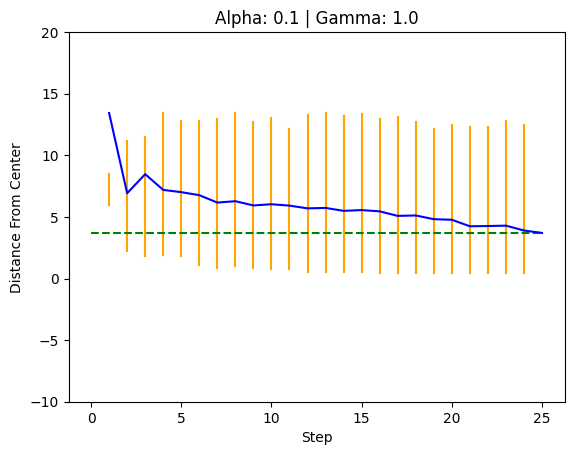

Final dist: 3.7001683785614174




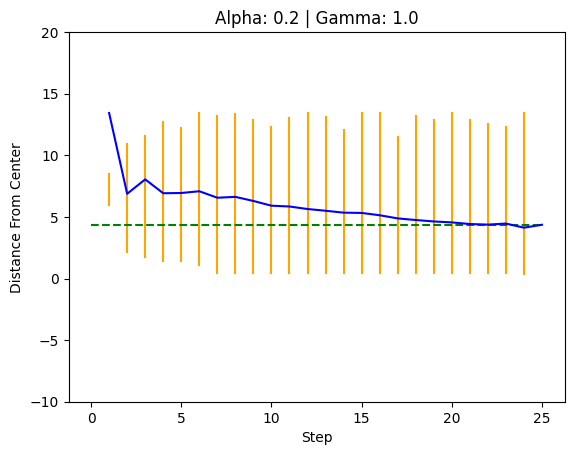

Final dist: 4.363234352307129




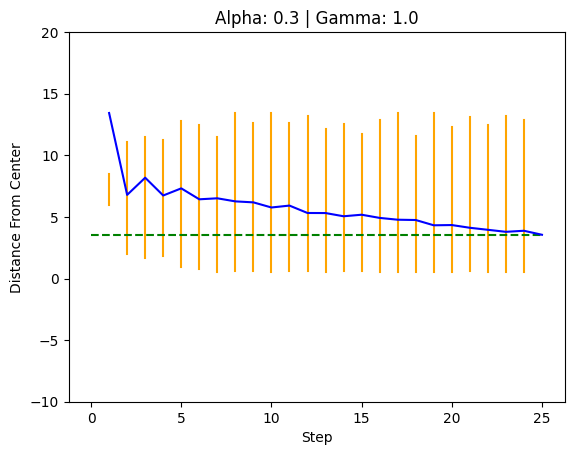

Final dist: 3.5510586194404112




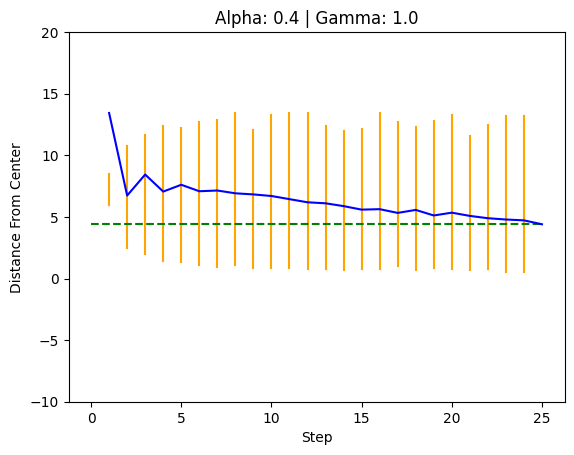

Final dist: 4.402343838602122




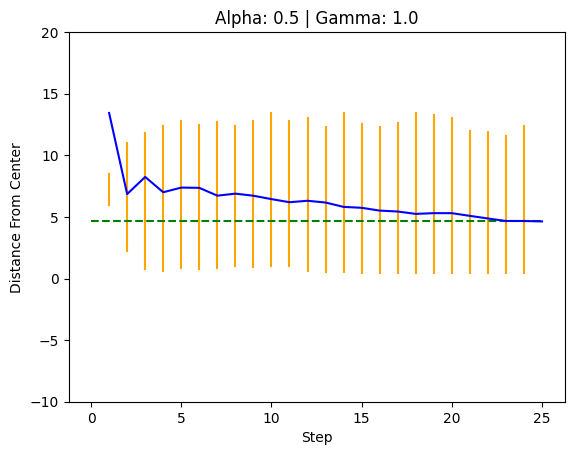

Final dist: 4.636115931203664




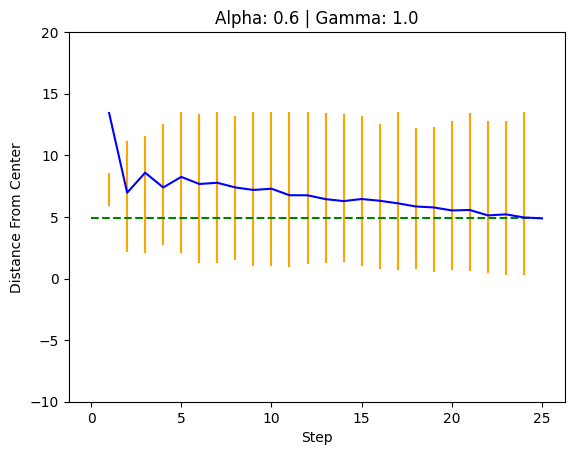

Final dist: 4.886078356222623




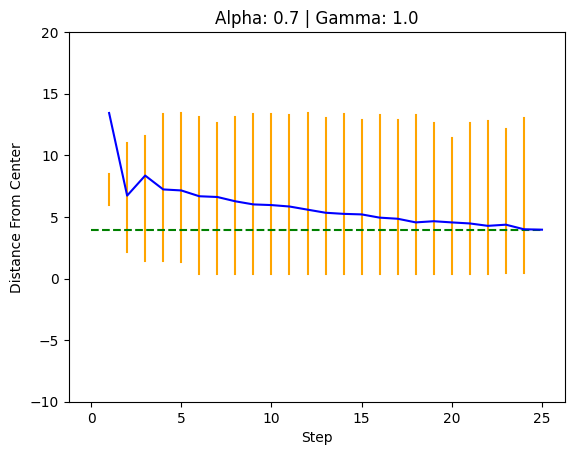

Final dist: 3.9646058320558026




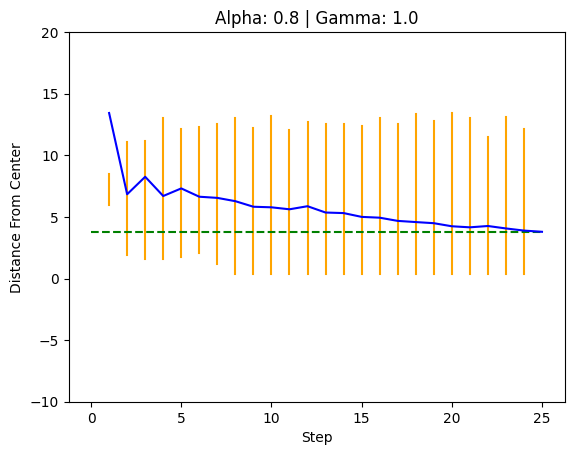

Final dist: 3.7929602307159582




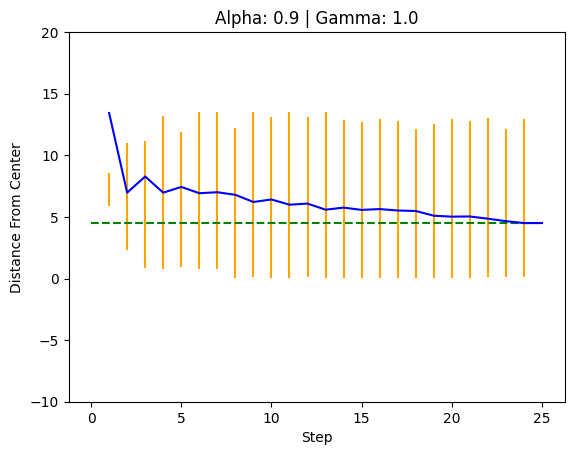

Final dist: 4.504443560377339




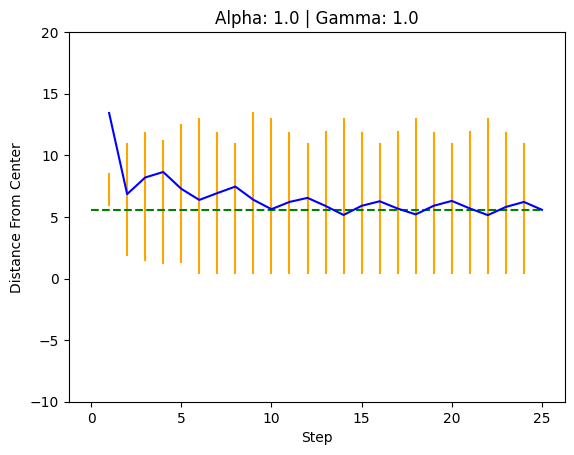

Final dist: 5.57856177364463




In [ ]:
#Simulate model distance from center (avg across 100 runs) for gamma and alpha values 0 through 1 incremented by 0.05
import math
#For later work:
results = []
finalBar = []
averageBars = []

#Save num steps (25)
steps=[]
for i in range(1,26):
  steps.append(i)

#For error bars
errorBars = []
for i in range(1,26):
  errorBars.append([100,0])

#Find avg distance at each step
for gammaI in range(1,12):
  gamma = 0.1*(gammaI-1)
  for alphaI in range(1,12):
    dist=[]
    errorBars = []
    for i in range(1,26):
      errorBars.append([100,0])
    for i in range(1,26):
      dist.append(0)
    alpha = 0.1*(alphaI-1)
    for i in range (100):
      xSet, ySet = simulate(alpha, gamma)
      for step in range(len(xSet)):
        distanceCenter = math.sqrt((xSet[step]-9.5)**2+(ySet[step]-9.5)**2)
        dist[step] += distanceCenter/100
        if(distanceCenter<=errorBars[step][0]):
          errorBars[step][0]=distanceCenter
        if(distanceCenter>=errorBars[step][1]):
          errorBars[step][1]=distanceCenter

    plt.xlabel("Step")
    plt.ylabel("Distance From Center")
    plt.title("Alpha: " + str(float(int(alpha*10))/10) + " | Gamma: " + str(float(int(gamma*10))/10))
    plt.ylim(-10, 20)
    for i in range(0, len(errorBars)):
      plt.plot([i,i], errorBars[i], color='orange')
    plt.plot([0,25],[dist[-1],dist[-1]], color = 'green', linestyle = "dashed")
    plt.plot(steps, dist, color = 'blue')
    plt.show()
    if(dist[-1]>10):
      results.append(round(dist[-1], 1))
    else:
      results.append(round(dist[-1], 2))
    finalBar.append(errorBars[-1][1]-errorBars[-1][0])
    averageBar = 0
    for i in range(0,25):
      averageBar += (errorBars[i][1]-errorBars[i][0])/25
    averageBars.append(averageBar)
    print("Final dist: " + str(dist[-1]) + "\n\n")

min_val = min(results)
max_val = max(results)

3.43


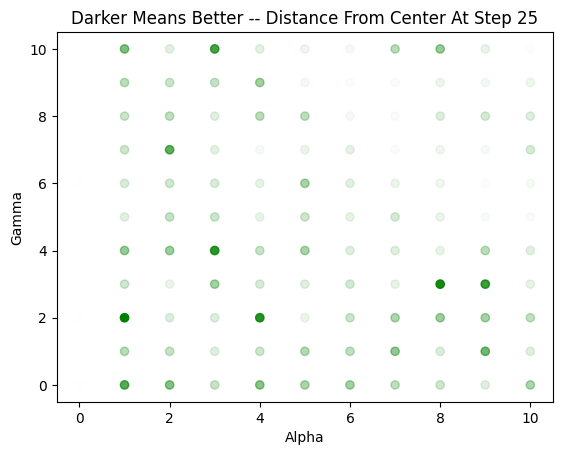

3.43


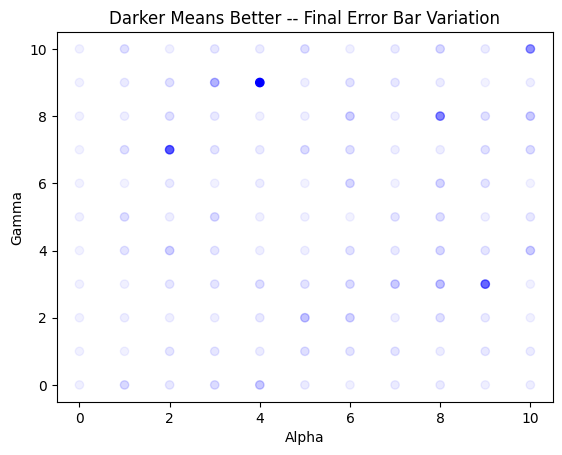

3.43


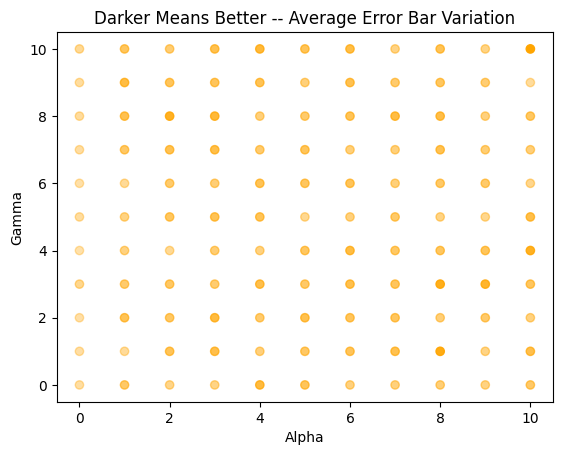

In [ ]:
#Visualize the results of the above numbers, taking the max and min and calculating deviation from those in order the evakuate performance, so essentially
gammaY = []
alphaX = []
resultAlpha = []
print(min_val)
for gamma in range(11):
  for alpha in range(11):
    alphaX.append(alpha)
    gammaY.append(gamma)
    resultAlpha.append((min_val/results[gamma*11+alpha])**9)
plt.scatter(alphaX, gammaY, alpha = resultAlpha, color = 'green')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
plt.title("Darker Means Better -- Distance From Center At Step 25")
plt.show()

#Visualize the results of the above numbers, taking the max and min and calculating deviation from those in order the evakuate performance, so essentially
gammaY = []
alphaX = []
resultAlpha = []
print(min_val)
for gamma in range(11):
  for alpha in range(11):
    alphaX.append(alpha)
    gammaY.append(gamma)
    resultAlpha.append((min(finalBar)/finalBar[gamma*11+alpha])**9)
plt.scatter(alphaX, gammaY, alpha = resultAlpha, color = 'blue')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
plt.title("Darker Means Better -- Final Error Bar Variation")
plt.show()

#Visualize the results of the above numbers, taking the max and min and calculating deviation from those in order the evakuate performance, so essentially
gammaY = []
alphaX = []
resultAlpha = []
print(min_val)
for gamma in range(11):
  for alpha in range(11):
    alphaX.append(alpha)
    gammaY.append(gamma)
    resultAlpha.append((min(averageBars)/averageBars[gamma*11+alpha])**9)
plt.scatter(alphaX, gammaY, alpha = resultAlpha, color = 'orange')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
plt.title("Darker Means Better -- Average Error Bar Variation")
plt.show()

4.9439999999999875
Darker colors mean less steps to center (more ideal)


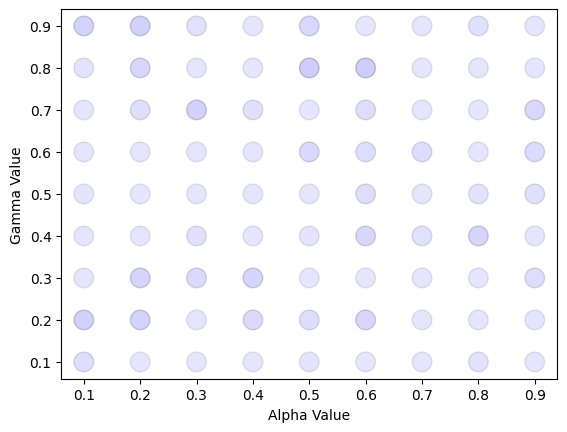

In [ ]:
#Calculate the average number of steps across 1000 episodes that the agent takes to get within 3 of the center of the gradient:
numStepsAvg = 0
numSteps = 0
alphaX = []
gammaY = []
keySteps = []
for alphaL in range(1,10):
  alpha = alphaL*0.1
  for gammaL in range(1,10):
    gamma = gammaL*0.1
    alphaX.append(alpha)
    gammaY.append(gamma)
    numStepsAvg = 0
    for episodes in range(1000):
      x,y = simulate(alpha, gamma)
      numSteps = 0
      for step in range (len(x)):
        numSteps +=1
        distance = math.sqrt((x[step]-9.5)**2+(y[step]-9.5)**2)
        if(distance<=1.5):
          numStepsAvg += numSteps/1000
          break
    if(numStepsAvg == 0):
      numStepsAvg = 25
    keySteps.append(numStepsAvg)

maxSteps = max(keySteps)
print(maxSteps)
for i in range(len(keySteps)):
  keySteps[i]/=maxSteps
  keySteps[i] = 1-keySteps[i]
  if(keySteps[i]<0.05):
    keySteps[i] = 0.05

#Visualize:
print("Darker colors mean less steps to center (more ideal)")
plt.xlabel("Alpha Value")
plt.ylabel("Gamma Value")
plt.scatter(alphaX, gammaY, alpha = keySteps, color = 'blue', s= 200, edgecolors='black')


In [ ]:
count = 0
for alpha in range (1,7):
  alphaM = 0.01+0.196*(alpha-1)
  for gamma in range (1,7):
    gammaM = 0.01+0.196*(gamma-1)
    count+=1

    x,y = simulate(alphaM, gammaM)

    #Visualize
    plt.figure(figsize=(8, 8))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Path taken -- Alpha: ' + str(alphaM) + " -- Gamma: " + str(gammaM) + " -- " + str(count))
    plt.grid(True)
    plt.xlim(0, 19)
    plt.ylim(0, 19)
    plt.xticks(range(20))
    plt.yticks(range(20))


    xG, yG, colorG, gradient, reward = defineScene()
    plt.scatter(xG, yG, color = colorG, s = 1000, alpha = gradient )
    plt.plot(x,y, color = "blue")
    plt.scatter(x[-1], y[-1], color = "black")